# Directory

In [1]:
directory = ""
    
print(directory)

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import seaborn as sns

print("libraries imported!")

libraries imported!


# variables

In [3]:
plt.style.use("Solarize_Light2")

In [4]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

# CASOS

Casos diarios y acumulados

In [6]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        7       0           1           0      6       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-11-24     1203     190         141         648     38       9   
2021-11-25     1125     156         134         559     18      20   
2021-11-26     1359     154         162         745     22      29   
2021-11-27      642     122          50         346     13      13   
2021-11-28      715      86          41         513     15       2   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-11-24          50     114     2     11  
2021-11-25          57     159     8     14  
2021-11-26         114     114     5     14  
2021-11-27          19      66     3     10  
2021-11-28          35      14     0      9  

[629 rows x 10 columns]

In [7]:
#promedio movil casos
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [8]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        1       0           0           1      0       0   
2020-03-13        8       0           1           1      6       0   
2020-03-14        8       0           1           1      6       0   
...             ...     ...         ...         ...    ...     ...   
2021-11-24   532539  106969       80332      190007  25383   24549   
2021-11-25   533664  107125       80466      190566  25401   24569   
2021-11-26   535023  107279       80628      191311  25423   24598   
2021-11-27   535665  107401       80678      191657  25436   24611   
2021-11-28   536380  107487       80719      192170  25451   24613   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10           0       0      0      0  
2020-03-11           0       0      0      0  
2020-03-12           0       0      0      0  
2020-03-13           0       0      0      0  
2020-03-14           0       0      0      0  
...                ...     ...    ...    ...  
2021-11-24       35879   41656  20738   7026  
2021-11-25       35936   41815  20746   7040  
2021-11-26       36050   41929  20751   7054  
2021-11-27       36069   41995  20754   7064  
2021-11-28       36104   42009  20754   7073  

[629 rows x 10 columns]

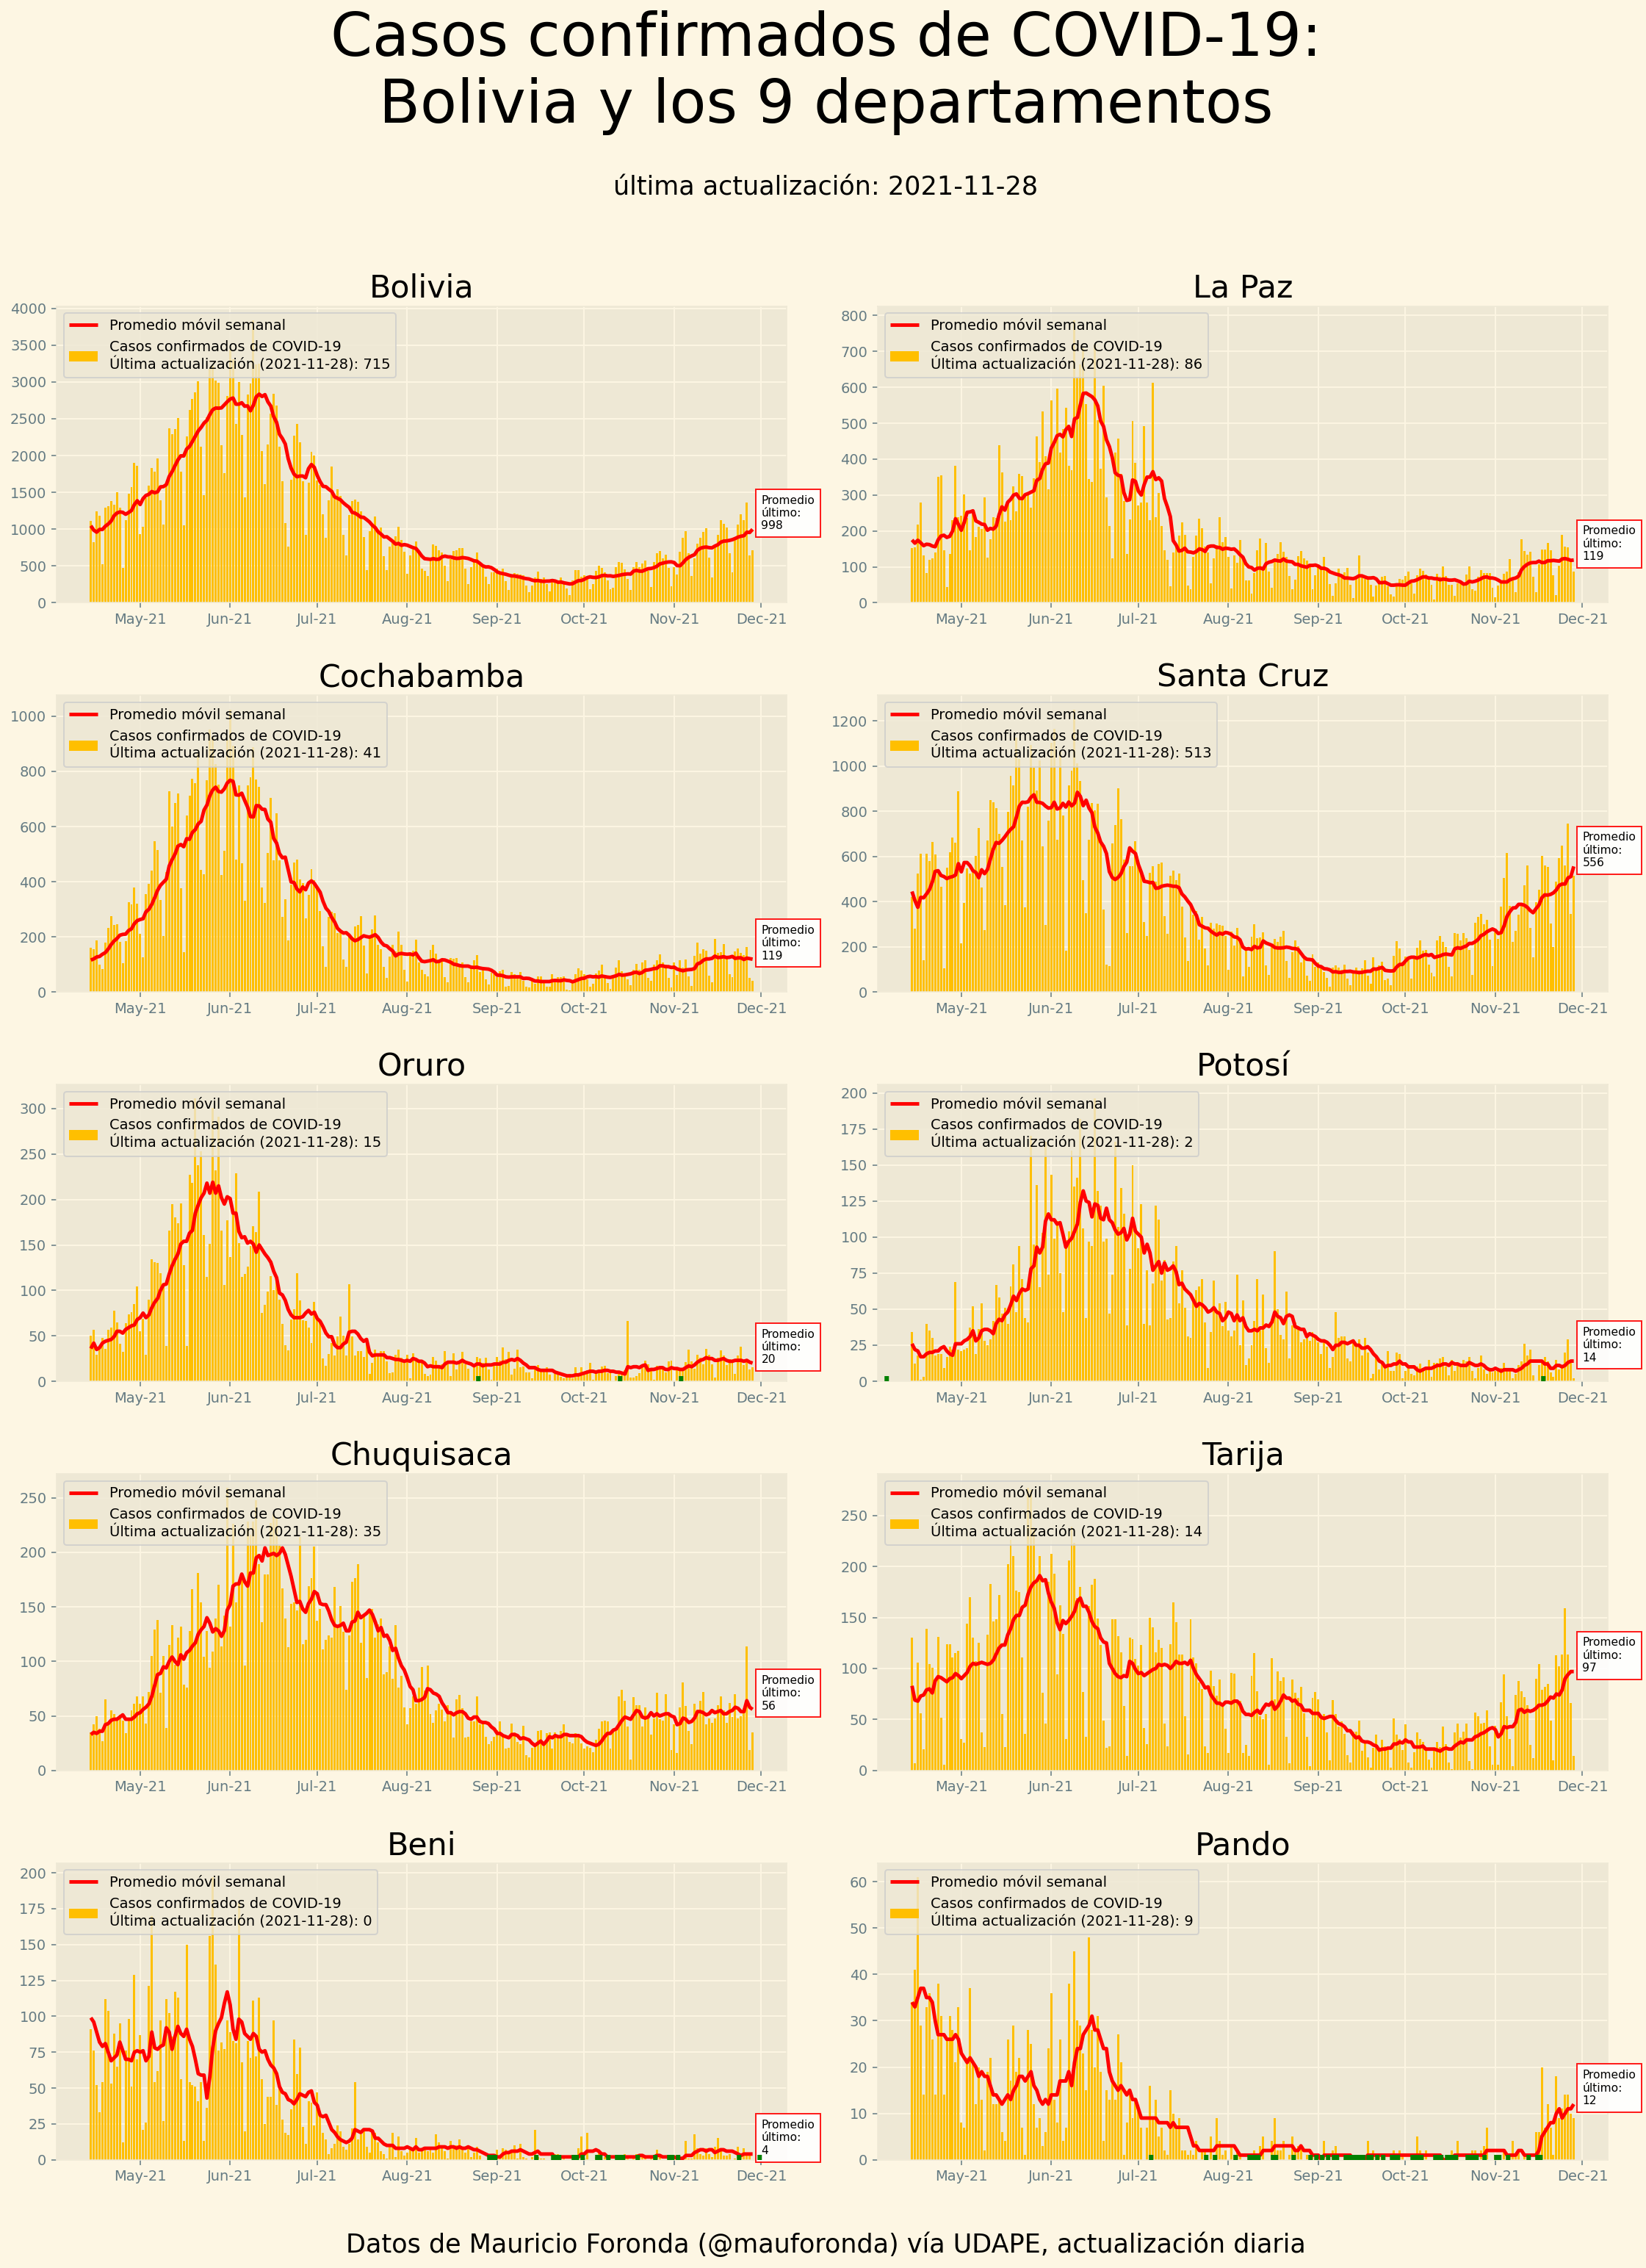

In [9]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)
axs = axs.flatten()

fig.suptitle("Casos confirmados de COVID-19:\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(.5, .97, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)

start_day = 400

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].bar(casos_diarios.index[start_day:], casos_diarios[casos_diarios.columns[i]][start_day:], 
             color = "#ffbf00", 
             label="Casos confirmados de COVID-19\nÚltima actualización ({}): {}".format(casos_diarios.index[-1].date(),casos_diarios.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
    axs[i].set_title(casos_diarios.columns[i], fontsize = 22)
    axs[i].plot(casos_diarios.index[start_day:], casos_diarios7[casos_diarios7.columns[i]][start_day:], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=2.5)
    #axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
    #axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs[i].annotate( "Promedio\núltimo:\n" + str(casos_diarios7.iloc[-1,i].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=3), casos_diarios7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )
    #if casos_diarios.iloc[:,i]==0:
    no_cases_df= casos_diarios[casos_diarios.iloc[:,i]==0].iloc[:,i]
    for k in range(len(no_cases_df)):
                 axs[i].annotate(text=".",
                     xy=(no_cases_df.index[k], no_cases_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 casos en este día"
                                )
    axs[i].legend(loc="upper left")

fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

In [10]:
fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

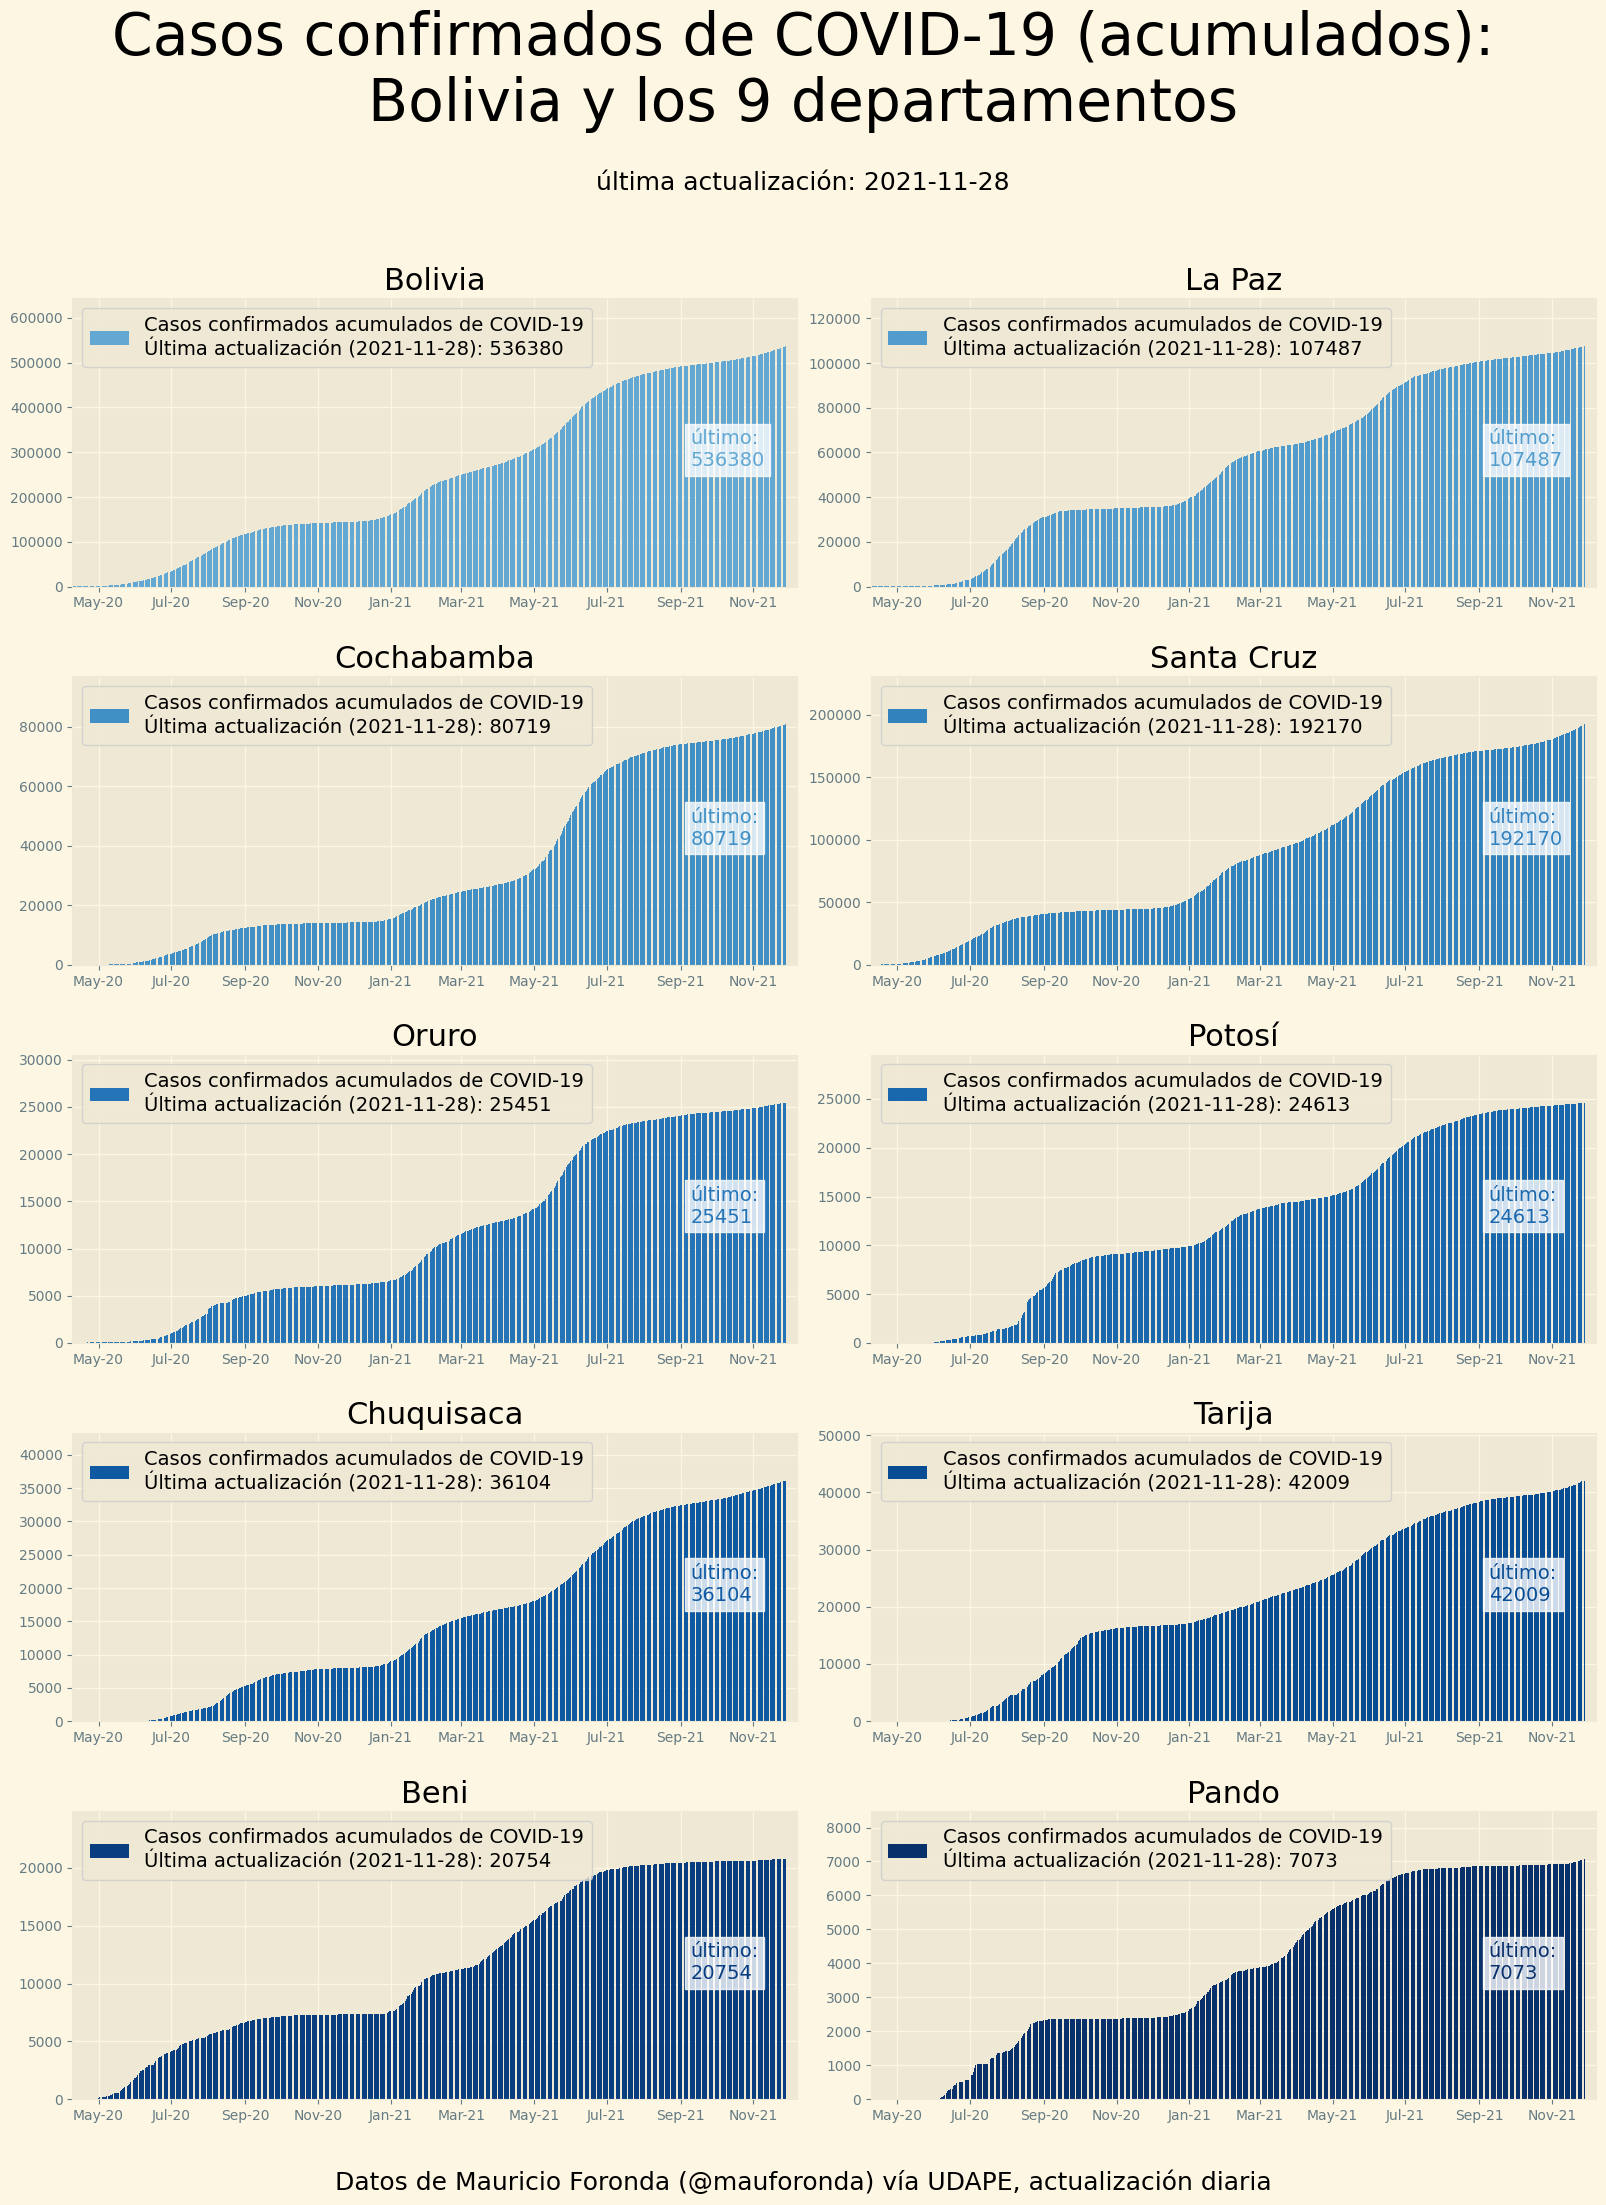

In [11]:
fig, axs = plt.subplots(5,2, figsize = (16,20), 
                        dpi=100,
                        sharey=False
                        )
axs = axs.flatten()


fig.suptitle("Casos confirmados de COVID-19 (acumulados):\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(.5, .97, "última actualización: {}".format(casos_acumulados.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)


for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_acumulados.index, casos_acumulados[casos_acumulados.columns[i]], 
             color = plt.get_cmap("Blues",20)(range(10,20))[i], 
             label="Casos confirmados acumulados de COVID-19\nÚltima actualización ({}): {}".format(casos_acumulados.index[-1].date(),casos_acumulados.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_acumulados.columns[i], fontsize = 22)
  #axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  #axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_acumulados[casos_acumulados.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_acumulados.index[30], casos_acumulados.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left", fontsize=14)
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "último:\n" + str(casos_acumulados.iloc[-1,i].astype(int)),
      xy = (casos_acumulados.index[-1] - datetime.timedelta(days=80), casos_acumulados.iloc[-1,i]/2),
      fontsize=14,
      color = cm.get_cmap("Blues",20)(range(10,20))[i],
      bbox={
              'edgecolor': 'w',
              'facecolor': 'w', 
              'alpha': .8}
          )


fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)


In [12]:
fig.savefig(directory + "graficas/casos_todos_acum.jpg", bbox_inches="tight")

# Muertes

In [13]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-11-24        8       4           0           3      1       0   
2021-11-25       17       3           0           9      0       0   
2021-11-26       16       3           2           8      1       0   
2021-11-27       17       3           0          10      1       1   
2021-11-28        7       1           1           5      0       0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-11-24           0       0     0      0  
2021-11-25           0       4     1      0  
2021-11-26           1       0     1      0  
2021-11-27           2       0     0      0  
2021-11-28           0       0     0      0  

[629 rows x 10 columns]

In [14]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
# muertes_diarias7.tail()

In [15]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-11-24    17381    2700        2794        6005   1326     859   
2021-11-25    17398    2703        2794        6014   1326     859   
2021-11-26    17414    2706        2796        6022   1327     859   
2021-11-27    17431    2709        2796        6032   1328     860   
2021-11-28    17438    2710        2797        6037   1328     860   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-11-24        1403    1073   897    324  
2021-11-25        1403    1077   898    324  
2021-11-26        1404    1077   899    324  
2021-11-27        1406    1077   899    324  
2021-11-28        1406    1077   899    324  

[629 rows x 10 columns]

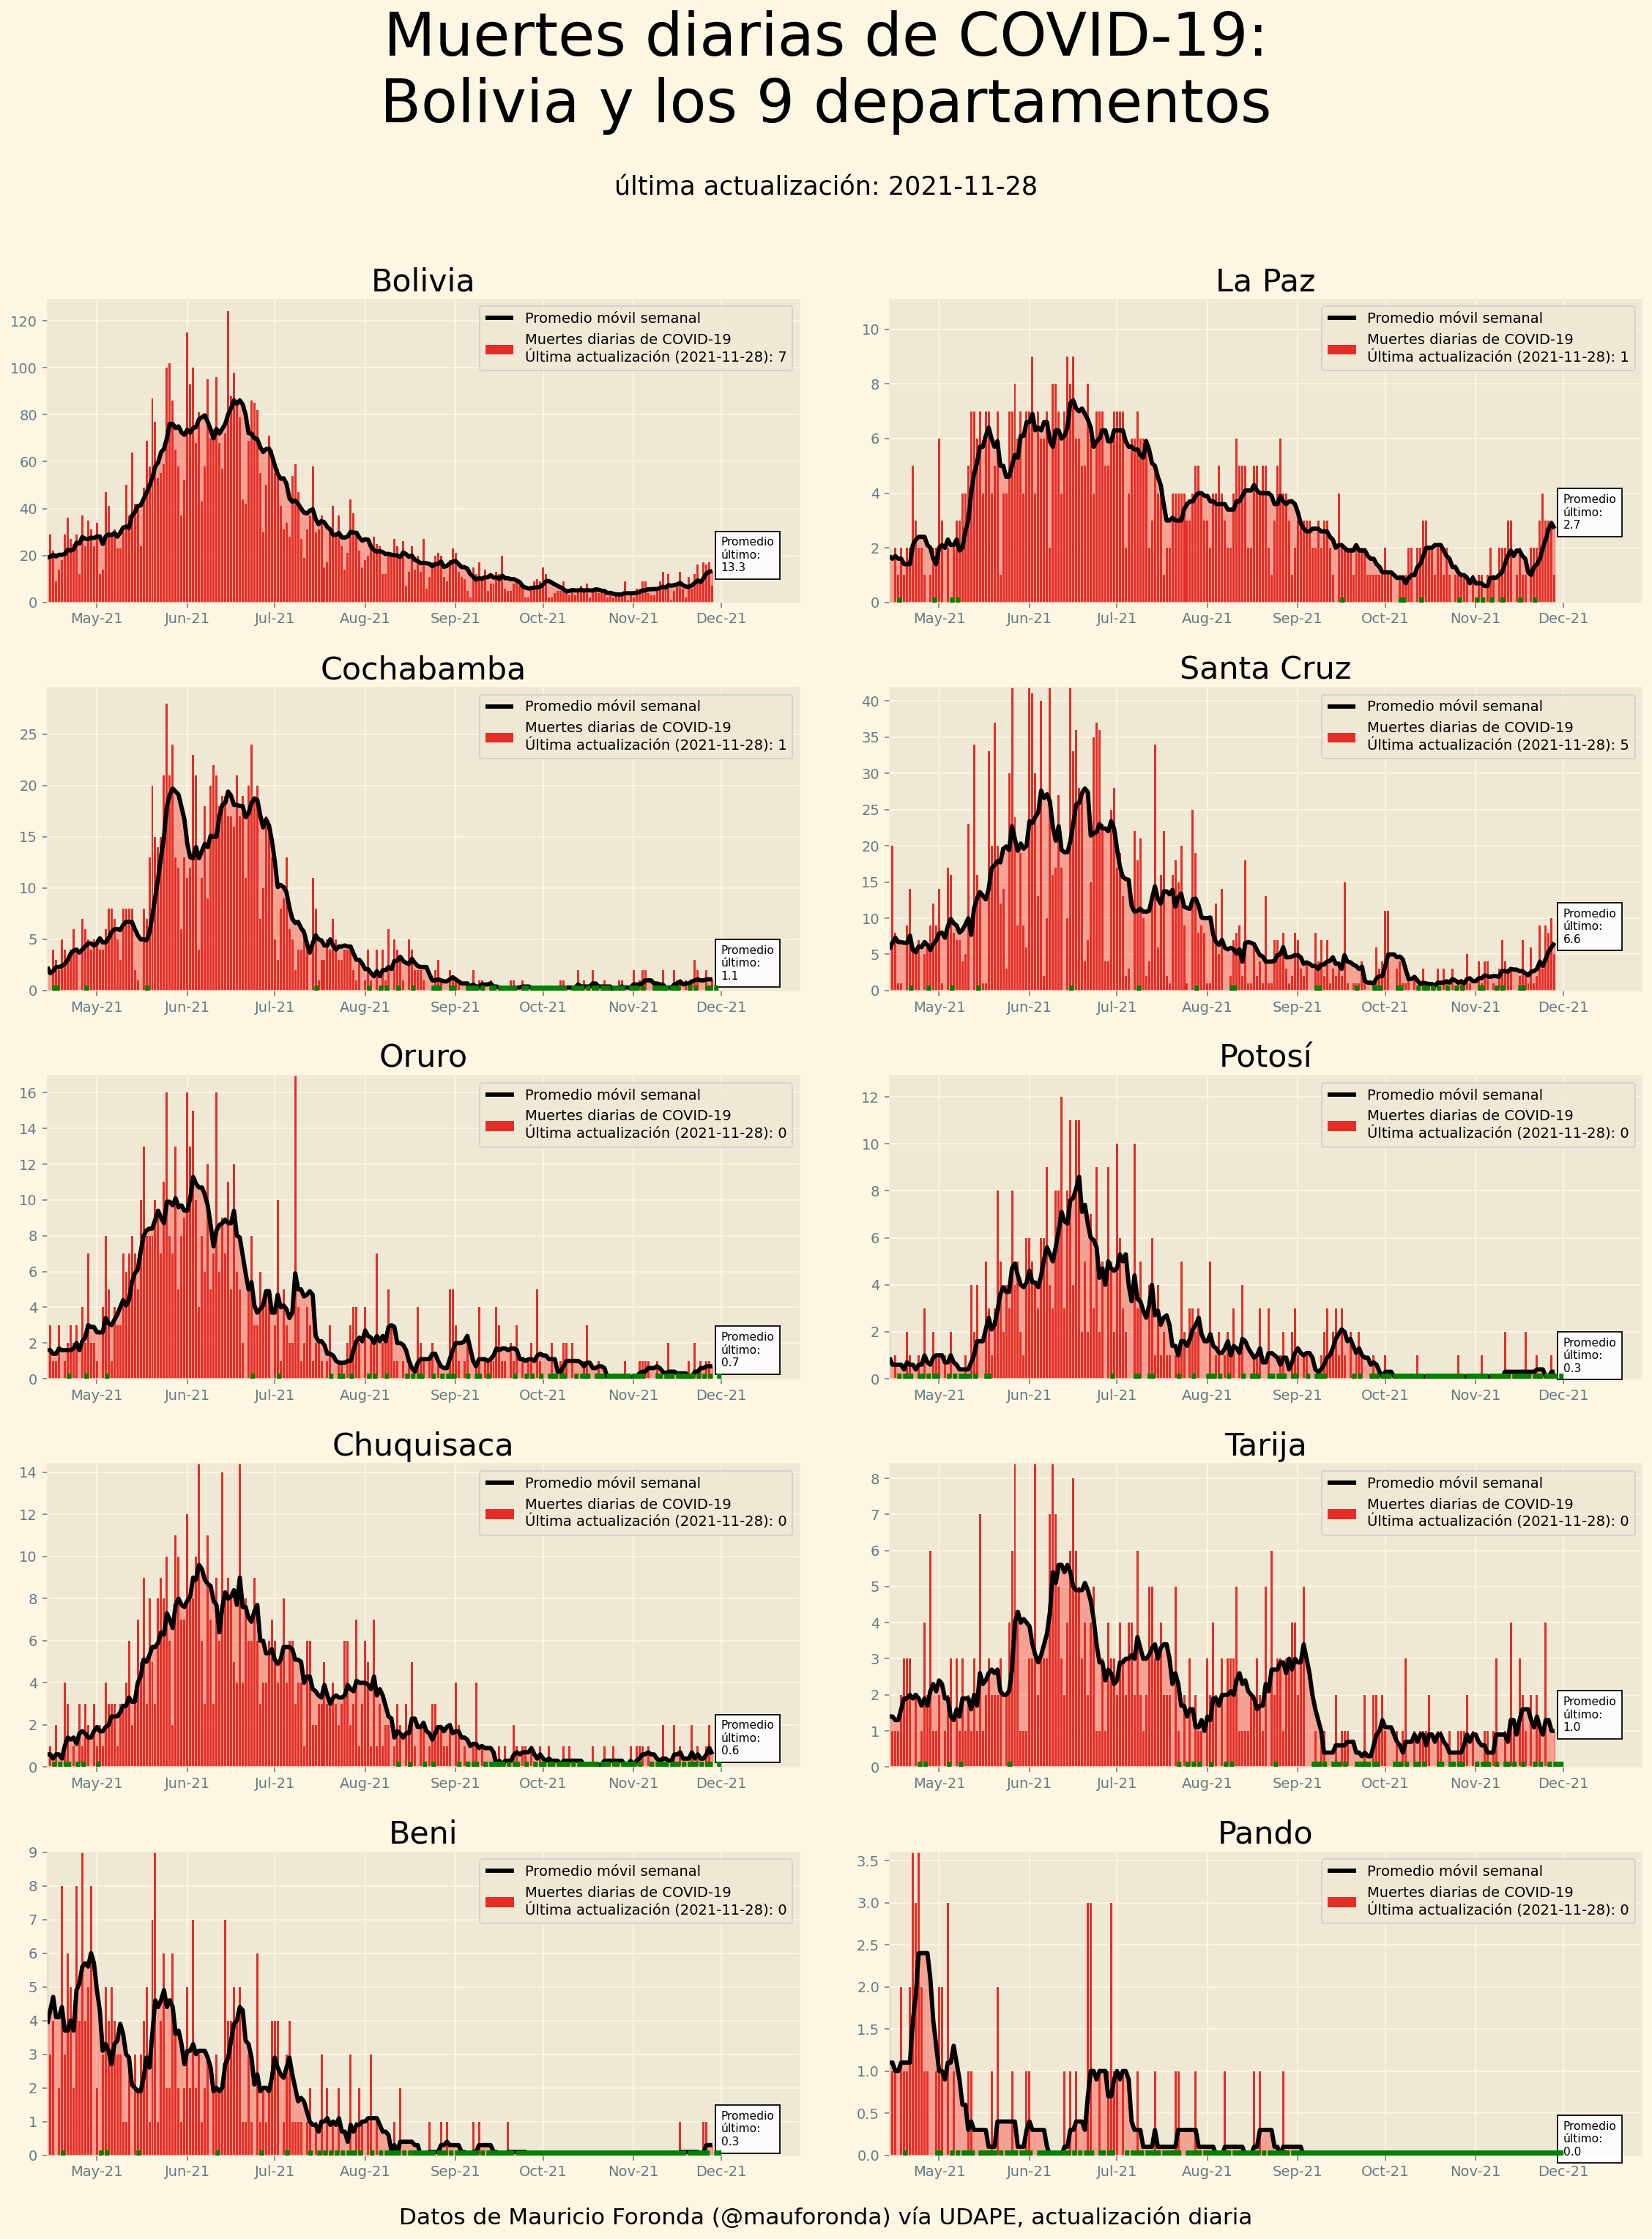

In [16]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)
axs = axs.flatten()

start_day = 400


fig.suptitle("Muertes diarias de COVID-19:\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(0.5, .97,"última actualización: {}".format(muertes_diarias.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.02,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].bar(muertes_diarias.index[start_day:], muertes_diarias[muertes_diarias.columns[i]][start_day:], #color = "r", 
             label="Muertes diarias de COVID-19\nÚltima actualización ({}): {}".format(muertes_diarias.index[-1].date(),muertes_diarias.iloc[-1,i].astype(int)),
             width=.75 ,zorder=2,
             color=plt.get_cmap("Reds", 10)(range(6,7)))
    axs[i].set_title(muertes_diarias.columns[i], fontsize=22)
    axs[i].plot(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
    axs[i].fill_between(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "red", zorder=1, alpha=.3)
    # axs[i].set_facecolor(background_color2)
    axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]][start_day:].max()*1.5)
    axs[i].set_xlim(muertes_diarias.index[start_day], muertes_diarias.index[-1] + datetime.timedelta(days=30))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs[i].annotate( "Promedio\núltimo:\n" + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=3), muertes_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .9}
          )

    #if casos_diarios.iloc[:,i]==0:
    no_deaths_df= muertes_diarias[muertes_diarias.iloc[:,i]==0].iloc[:,i]
    for k in range(len(no_deaths_df)):
                 axs[i].annotate(text=".",
                     xy=(no_deaths_df.index[k], no_deaths_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 muertes en este día")
    axs[i].legend()

fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

In [17]:
muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [18]:
desc_y_sosp_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
desc_y_sosp_edu = desc_y_sosp_edu[desc_y_sosp_edu.columns].apply(pd.to_numeric, errors = "coerce")
desc_y_sosp_edu.index = pd.to_datetime(desc_y_sosp_edu.index)

desc_y_sosp_edu

La Paz  Unnamed: 2  Cochabamba  Unnamed: 4  Santa Cruz  \
Fecha                                                                
NaT            NaN         NaN         NaN         NaN         NaN   
2020-05-07    51.0      2294.0        25.0      1159.0         NaN   
2020-05-08    64.0      2399.0        29.0      1203.0         NaN   
2020-05-09    67.0      2515.0        29.0      1244.0         NaN   
2020-05-10    57.0      2578.0        29.0      1252.0         NaN   
...            ...         ...         ...         ...         ...   
2021-11-21     NaN    467558.0         NaN    417807.0         NaN   
2021-11-22     NaN    468111.0         NaN    418994.0         NaN   
2021-11-23     NaN    469804.0         NaN    420282.0         NaN   
2021-11-24     NaN    471644.0         NaN    421420.0         NaN   
2021-11-25     NaN    473386.0         NaN    422430.0         NaN   

            Unnamed: 6  Oruro  Unnamed: 8  Potosi  Unnamed: 10  Tarija  \
Fecha                                                                    
NaT                NaN    NaN         NaN     NaN          NaN     NaN   
2020-05-07      3444.0    2.0       465.0    20.0        156.0    15.0   
2020-05-08      3532.0    1.0       472.0    20.0        170.0    10.0   
2020-05-09      3638.0   15.0       475.0    33.0        186.0    10.0   
2020-05-10      3889.0    0.0       492.0     4.0        215.0    25.0   
...                ...    ...         ...     ...          ...     ...   
2021-11-21    872194.0    NaN     86266.0     NaN      64284.0     NaN   
2021-11-22    874771.0    NaN     86353.0     NaN      64379.0     NaN   
2021-11-23    877677.0    NaN     86664.0     NaN      64433.0     NaN   
2021-11-24    880530.0    NaN     86969.0     NaN      64477.0     NaN   
2021-11-25    883461.0    NaN     87424.0     NaN      64580.0     NaN   

            Unnamed: 12  Chuquisaca  Unnamed: 14   Beni  Unnamed: 16  Pando  \
Fecha                                                                         
NaT                 NaN         NaN          NaN    NaN          NaN    NaN   
2020-05-07         50.0        22.0        175.0  123.0        230.0   15.0   
2020-05-08         60.0        44.0        176.0    NaN        230.0   13.0   
2020-05-09         61.0         NaN          NaN    NaN        239.0    NaN   
2020-05-10         61.0        29.0        228.0  182.0        244.0    NaN   
...                 ...         ...          ...    ...          ...    ...   
2021-11-21     105294.0         NaN     104010.0    NaN      62636.0    NaN   
2021-11-22     105517.0         NaN     104263.0    NaN      62687.0    NaN   
2021-11-23     105812.0         NaN     104551.0    NaN      62792.0    NaN   
2021-11-24     106015.0         NaN     104879.0    NaN      62886.0    NaN   
2021-11-25     106411.0         NaN     105173.0    NaN      62986.0    NaN   

            Unnamed: 18  
Fecha                    
NaT                 NaN  
2020-05-07         76.0  
2020-05-08         79.0  
2020-05-09          NaN  
2020-05-10          NaN  
...                 ...  
2021-11-21      22070.0  
2021-11-22      22122.0  
2021-11-23      22199.0  
2021-11-24      22245.0  
2021-11-25      22312.0  

[569 rows x 18 columns]

In [19]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [20]:
descartados = desc_y_sosp_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9) #9=departamentos

descartados.to_csv(directory + "descartados_acumulados.csv")

# descartados = descartados.interpolate()

# errores?
# descartados.at["2021-09-17 00:00:00", "Santa Cruz"] = np.nan #pd.datetime(2021,9,3)
descartados.at["2021-07-20 00:00:00", "Potosí"] = np.nan #2021-07-20 00:00:00
descartados.at["2021-07-15 00:00:00", "Chuquisaca"] = np.nan #2021-07-15 00:00:00
descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan

for i in ordenado:
    descartados.loc[descartados[i].shift(-1) == descartados[i]] = np.nan


# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan

# descartados = descartados.interpolate()

# descartados.index = descartados.index.date()

descartados.tail(60)

La Paz  Cochabamba  Santa Cruz    Oruro   Potosí    Tarija  \
Fecha                                                                      
2021-09-27  399273.0    364002.0    768750.0  72715.0  60211.0   94820.0   
2021-09-28  400319.0    365189.0    770996.0  73054.0  60354.0   95083.0   
2021-09-29  402018.0    366412.0    773307.0  73517.0  60562.0   95426.0   
2021-09-30  403447.0    367415.0    775240.0  73867.0  60660.0   95658.0   
2021-10-01  404847.0    368560.0    777387.0  74425.0  60786.0   96024.0   
2021-10-02  406306.0    369411.0         NaN  74842.0  60838.0   96140.0   
2021-10-03  406830.0         NaN         NaN  74981.0  60873.0   96282.0   
2021-10-04  407120.0    370691.0    781181.0  75156.0  60884.0   96533.0   
2021-10-05  408490.0    371709.0    783484.0  75550.0  61156.0   96822.0   
2021-10-06  410319.0    372970.0    785803.0  75819.0  61343.0   97081.0   
2021-10-07  412195.0    373996.0    788273.0  75994.0  61473.0   97319.0   
2021-10-08  414130.0    374906.0    790509.0  76186.0  61563.0   97629.0   
2021-10-09  416260.0    375399.0         NaN  76406.0  61596.0   97717.0   
2021-10-10  416748.0    375613.0         NaN  76645.0  61608.0   97738.0   
2021-10-11  416927.0    376826.0    793164.0  76740.0  61711.0   97894.0   
2021-10-12  418135.0    377943.0    795685.0  76965.0  61794.0   98186.0   
2021-10-13  419654.0    379274.0    798036.0  77216.0  61905.0   98366.0   
2021-10-14  421320.0    380514.0    800237.0  77549.0  61967.0   98665.0   
2021-10-15  422518.0    381639.0    802333.0  77787.0  62074.0   99005.0   
2021-10-16  423688.0    382221.0         NaN  78496.0      NaN   99156.0   
2021-10-17  424519.0    382574.0    804015.0  78709.0  62207.0   99183.0   
2021-10-18  424833.0    384019.0    806275.0  78793.0  62272.0   99454.0   
2021-10-19  425946.0    385248.0    808725.0  79100.0  62389.0   99689.0   
2021-10-20  427221.0    386205.0    810919.0  79355.0  62415.0   99897.0   
2021-10-21  428247.0    387281.0         NaN  79563.0  62574.0  100188.0   
2021-10-22  429562.0    388730.0         NaN  79784.0      NaN  100409.0   
2021-10-23  431071.0    389721.0    817400.0  80005.0  62687.0  100482.0   
2021-10-24  431835.0    390268.0    818050.0  80193.0  62715.0  100508.0   
2021-10-25  432271.0    391534.0    820123.0  80247.0  62883.0  100655.0   
2021-10-26  433449.0    392531.0    822358.0  80459.0  62954.0  101010.0   
2021-10-27  435254.0    393766.0    824684.0  80721.0  63053.0  101209.0   
2021-10-28  436843.0    394955.0    827027.0  81054.0  63130.0  101415.0   
2021-10-29  438275.0    396217.0         NaN  81434.0  63178.0  101663.0   
2021-10-30  439613.0    396869.0         NaN  81817.0  63201.0  101766.0   
2021-10-31  440225.0    397190.0         NaN  81943.0  63225.0  101815.0   
2021-11-01  440669.0    398067.0    833832.0  81987.0  63231.0  101973.0   
2021-11-02  441725.0    398559.0         NaN  82146.0      NaN  102018.0   
2021-11-03  442276.0    400021.0    837163.0  82242.0  63342.0  102233.0   
2021-11-04  443548.0    400947.0    839753.0  82420.0  63393.0  102418.0   
2021-11-05  445006.0    402324.0    842762.0  82681.0  63460.0  102643.0   
2021-11-06  446692.0    403089.0    844364.0  82924.0  63490.0  102752.0   
2021-11-07  447265.0    403493.0    845712.0  83139.0  63515.0  102784.0   
2021-11-08  447758.0    404784.0    847095.0  83215.0  63612.0  102940.0   
2021-11-09  448887.0    406560.0         NaN  83509.0      NaN  103120.0   
2021-11-10  450885.0    407886.0    850118.0  83763.0  63663.0  103216.0   
2021-11-11  452628.0    409143.0    851974.0  84005.0  63732.0  103441.0   
2021-11-12  454188.0    410187.0    853594.0  84258.0  63834.0  103633.0   
2021-11-13  455843.0    410780.0         NaN  84551.0      NaN  103746.0   
2021-11-14  456628.0    411175.0    856444.0  84692.0  63909.0  103765.0   
2021-11-15  457100.0    412482.0    858317.0  84738.0  63913.0  104023.0   
2021-11-16  458800.0    413514.0    860395.0  84977.0  63971.0

In [21]:
############################## No hay sospechosos desde mediados del 2021

# sospechosos = desc_y_sosp_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
# #for i in range(9):
# #    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
# sospechosos["Bolivia"] = sospechosos.sum(axis=1)
# sospechosos.tail(118)

Bolivia    La Paz  Cochabamba    Santa Cruz     Oruro  \
2021-09-30  2.446559e+06  505993.0    442818.0  9.492480e+05   98320.0   
2021-10-01  2.452943e+06  507468.0    444027.0  9.515530e+05   98886.0   
2021-10-02  2.456584e+06  509014.0    444924.0  9.529403e+05   99315.0   
2021-10-03  2.460224e+06  509592.0    445589.5  9.543277e+05   99474.0   
2021-10-04  2.463865e+06  509907.0    446255.0  9.557150e+05   99651.0   
2021-10-05  2.470369e+06  511354.0    447339.0  9.582150e+05  100054.0   
2021-10-06  2.477471e+06  513279.0    448677.0  9.607630e+05  100334.0   
2021-10-07  2.484310e+06  515244.0    449803.0  9.634170e+05  100525.0   
2021-10-08  2.490689e+06  517257.0    450764.0  9.658380e+05  100734.0   
2021-10-09  2.493974e+06  519454.0    451289.0  9.668153e+05  100963.0   
2021-10-10  2.497260e+06  519992.0    451515.0  9.677927e+05  101215.0   
2021-10-11  2.500545e+06  520180.0    452781.0  9.687700e+05  101310.0   
2021-10-12  2.506853e+06  521469.0    453986.0  9.715180e+05  101541.0   
2021-10-13  2.513691e+06  523061.0    455432.0  9.741170e+05  101802.0   
2021-10-14  2.520446e+06  524828.0    456747.0  9.765400e+05  102142.0   
2021-10-15  2.526453e+06  526101.0    457933.0  9.788350e+05  102392.0   
2021-10-16  2.529866e+06  527321.0    458561.0  9.797670e+05  103167.0   
2021-10-17  2.533280e+06  528203.0    458938.0  9.806990e+05  103384.0   
2021-10-18  2.538592e+06  528536.0    460464.0  9.832210e+05  103472.0   
2021-10-19  2.545103e+06  529704.0    461795.0  9.859300e+05  103785.0   
2021-10-20  2.551175e+06  531037.0    462832.0  9.883530e+05  104049.0   
2021-10-21  2.557273e+06  532119.0    464014.0  9.907413e+05  104273.0   
2021-10-22  2.563370e+06  533513.0    465578.0  9.931297e+05  104517.0   
2021-10-23  2.569468e+06  535124.0    466619.0  9.955180e+05  104757.0   
2021-10-24  2.572062e+06  535926.0    467207.0  9.962420e+05  104958.0   
2021-10-25  2.577103e+06  536395.0    468571.0  9.986220e+05  105014.0   
2021-10-26  2.583511e+06  537645.0    469683.0  1.001190e+06  105243.0   
2021-10-27  2.590528e+06  539541.0    471055.0  1.003863e+06  105521.0   
2021-10-28  2.597655e+06  541212.0    472352.0  1.006505e+06  105867.0   
2021-10-29  2.602190e+06  542727.0    473712.0  1.008439e+06  106257.0   
2021-10-30  2.606726e+06  544147.0    474414.0  1.010373e+06  106662.0   
2021-10-31  2.611261e+06  544801.0    474752.0  1.012307e+06  106811.0   
2021-11-01  2.615796e+06  545260.0    475736.0  1.014241e+06  106855.0   
2021-11-02  2.620354e+06  546363.0    476290.0  1.016212e+06  107027.0   
2021-11-03  2.624911e+06  546968.0    477868.0  1.018184e+06  107134.0   
2021-11-04  2.631379e+06  548321.0    478883.0  1.021280e+06  107325.0   
2021-11-05  2.639258e+06  549866.0    480378.0  1.024906e+06  107607.0   
2021-11-06  2.644567e+06  551673.0    481200.0  1.026890e+06  107885.0   
2021-11-07  2.647659e+06  552309.0    481627.0  1.028459e+06  108122.0   
2021-11-08  2.652257e+06  552831.0    483050.0  1.030112e+06  108212.0   
2021-11-09  2.658612e+06  554044.0    485006.0  1.031984e+06  108535.0   
2021-11-10  2.664968e+06  556219.0    486472.0  1.033857e+06  108815.0   
2021-11-11  2.671742e+06  558106.0    487884.0  1.036186e+06  109076.0   
2021-11-12  2.677770e+06  559800.0    489078.0  1.038365e+06  109365.0   
2021-11-13  2.682009e+06  561598.0    489730.0  1.040008e+06  109687.0   
2021-11-14  2.686248e+06  562456.0    490160.0  1.041651e+06  109847.0   
2021-11-15  2.691280e+06  562958.0    491660.0  1.043920e+06  109897.0   
2021-11-16  2.697928e+06  564766.0    492835.0  1.046451e+06  110162.0   
2021-11-17  2.706296e+06  566780.0    494100.0  1.050043e+06  110545.0   
2021-11-18  2.714223e+06  568890.0    495392.0  1.053425e+06  110855.0   
2021-11-19  2.721836e+06  570809.0    496632.0  1.056669e+06  111103.0   
2021-11-20  2.727757e+06  572844.0    497368.0  1.059013e+06  111334.0   
2021-11-21  2.731513e+06  574212.0    497692.0  1.060471e+06  111575.0   
2021-11-22  2.737474e

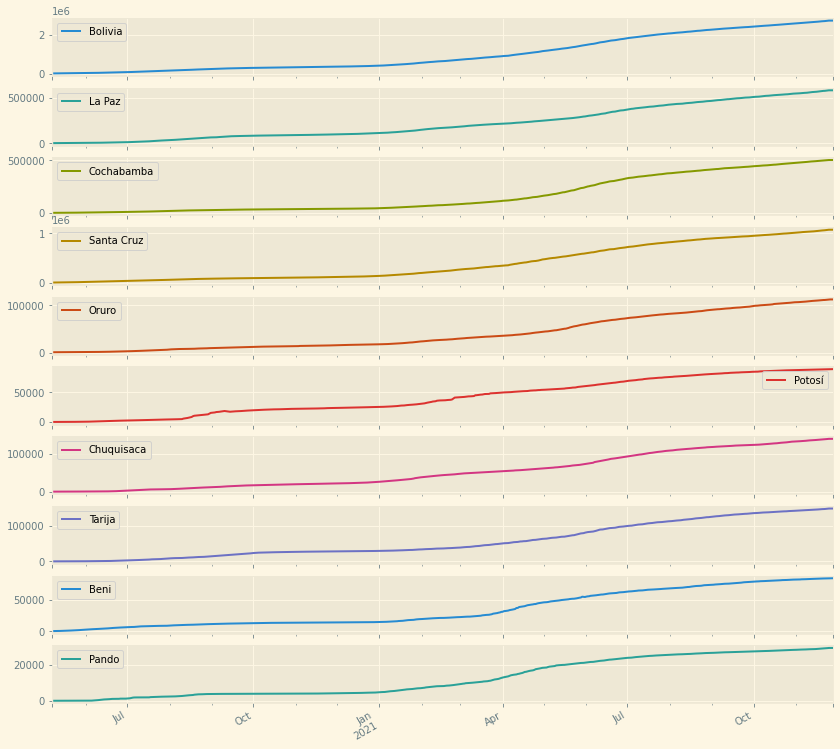

In [22]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).round(0)
pruebas_acum = pruebas_acum.interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.plot(subplots=True, figsize=(14,14))
pruebas_acum.tail(60)

Bolivia  La Paz  Cochabamba   Santa Cruz  Oruro  Potosí  \
2021-09-27  4733.000000   312.0      1143.0  2306.000000   89.0    94.0   
2021-09-28  5945.000000  1099.0      1251.0  2470.000000  354.0   163.0   
2021-09-29  7107.000000  1765.0      1308.0  2505.000000  470.0   227.0   
2021-09-30  5818.000000  1494.0      1080.0  2067.000000  365.0   100.0   
2021-10-01  6384.000000  1475.0      1209.0  2305.000000  566.0   133.0   
2021-10-02  3640.666667  1546.0       897.0  1387.333333  429.0    63.0   
2021-10-03  3640.666667   578.0       665.5  1387.333333  159.0    40.0   
2021-10-04  3640.666667   315.0       665.5  1387.333333  177.0    15.0   
2021-10-05  6504.000000  1447.0      1084.0  2500.000000  403.0   282.0   
2021-10-06  7102.000000  1925.0      1338.0  2548.000000  280.0   199.0   
2021-10-07  6839.000000  1965.0      1126.0  2654.000000  191.0   139.0   
2021-10-08  6379.000000  2013.0       961.0  2421.000000  209.0    99.0   
2021-10-09  3285.333333  2197.0       525.0   977.333333  229.0    48.0   
2021-10-10  3285.333333   538.0       226.0   977.333333  252.0    15.0   
2021-10-11  3285.333333   188.0      1266.0   977.333333   95.0   116.0   
2021-10-12  6308.000000  1289.0      1205.0  2748.000000  231.0    96.0   
2021-10-13  6838.000000  1592.0      1446.0  2599.000000  261.0   127.0   
2021-10-14  6755.000000  1767.0      1315.0  2423.000000  340.0    79.0   
2021-10-15  6007.000000  1273.0      1186.0  2295.000000  250.0   117.0   
2021-10-16  3413.500000  1220.0       628.0   932.000000  775.0    76.0   
2021-10-17  3413.500000   882.0       377.0   932.000000  217.0    76.0   
2021-10-18  5312.000000   333.0      1526.0  2522.000000   88.0    72.0   
2021-10-19  6511.000000  1168.0      1331.0  2709.000000  313.0   130.0   
2021-10-20  6072.000000  1333.0      1037.0  2423.000000  264.0    37.0   
2021-10-21  6097.666667  1082.0      1182.0  2388.333333  224.0   174.0   
2021-10-22  6097.666667  1394.0      1564.0  2388.333333  244.0    72.0   
2021-10-23  6097.666667  1611.0      1041.0  2388.333333  240.0    72.0   
2021-10-24  2594.000000   802.0       588.0   724.000000  201.0    35.0   
2021-10-25  5041.000000   469.0      1364.0  2380.000000   56.0   170.0   
2021-10-26  6408.000000  1250.0      1112.0  2568.000000  229.0    80.0   
2021-10-27  7017.000000  1896.0      1372.0  2673.000000  278.0   117.0   
2021-10-28  7127.000000  1671.0      1297.0  2642.000000  346.0    85.0   
2021-10-29  4535.250000  1515.0      1360.0  1934.000000  390.0    53.0   
2021-10-30  4535.250000  1420.0       702.0  1934.000000  405.0    30.0   
2021-10-31  4535.250000   654.0       338.0  1934.000000  149.0    30.0   
2021-11-01  4535.250000   459.0       984.0  1934.000000   44.0    13.0   
2021-11-02  4557.500000  1103.0       554.0  1971.500000  172.0    63.5   
2021-11-03  4557.500000   605.0      1578.0  1971.500000  107.0    63.5   
2021-11-04  6468.000000  1353.0      1015.0  3096.000000  191.0    64.0   
2021-11-05  7879.000000  1545.0      1495.0  3626.000000  282.0    74.0   
2021-11-06  5309.000000  1807.0       822.0  1984.000000  278.0    39.0   
2021-11-07  3092.000000   636.0       427.0  1569.000000  237.0    27.0   
2021-11-08  4598.000000   522.0      1423.0  1653.000000   90.0   102.0   
2021-11-09  6355.500000  1213.0      1956.0  1872.500000  323.0    38.0   
2021-11-10  6355.500000  2175.0      1466.0  1872.500000  280.0    38.0   
2021-11-11  6774.000000  1887.0      1412.0  2329.000000  261.0    95.0   
2021-11-12  6028.000000  1694.0      1194.0  2179.000000  289.0   120.0   
2021-11-13  4239.000000  1798.0       652.0  1643.000000  322.0    50.5   
2021-11-14  4239.000000   858.0       430.0  1643.000000  160.0    50.5   
2021-11-15  5032.000000   502.0      1500.0  2269.000000   50.0     4.0   
2021-11-16  6648.000000  1808.0      1175.0  2531.000000  265.0    69.0   
2021-11-17  8368.000000  2014.0      1265.0  3592.000000  383.0   168.0   
2021-11-18  7927.000000  2110.0      1292

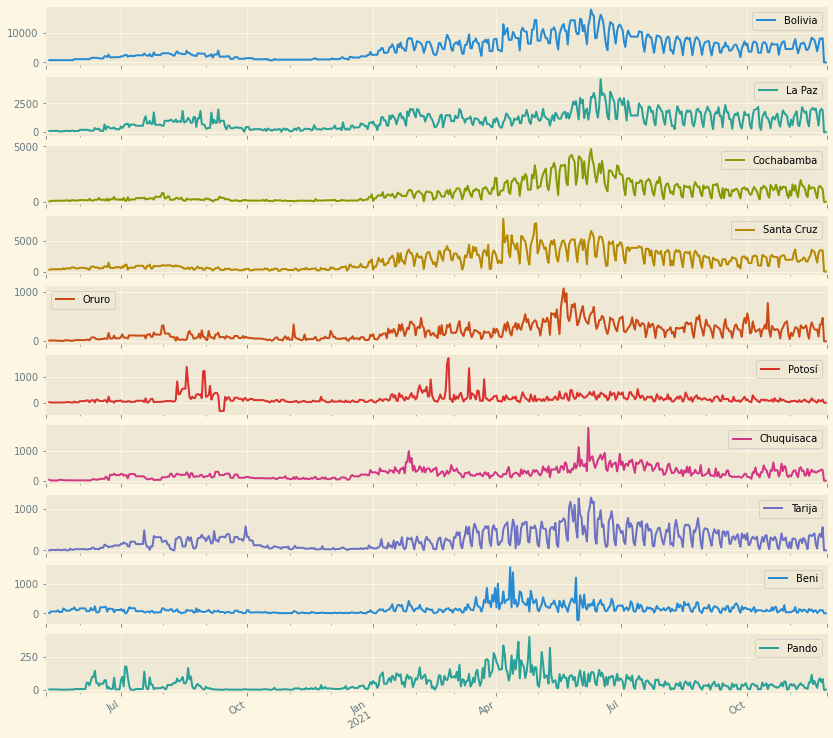

In [23]:
pruebas_diarias = pruebas_acum.diff()
pruebas_diarias.plot(subplots=True, figsize=(14,14),
                     # ylim=(-1000,0)
                    )
# plt.ylim(0,-1000)
pruebas_diarias = pruebas_diarias[pruebas_diarias.Bolivia>0]

pruebas_diarias.tail(60)


In [24]:
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

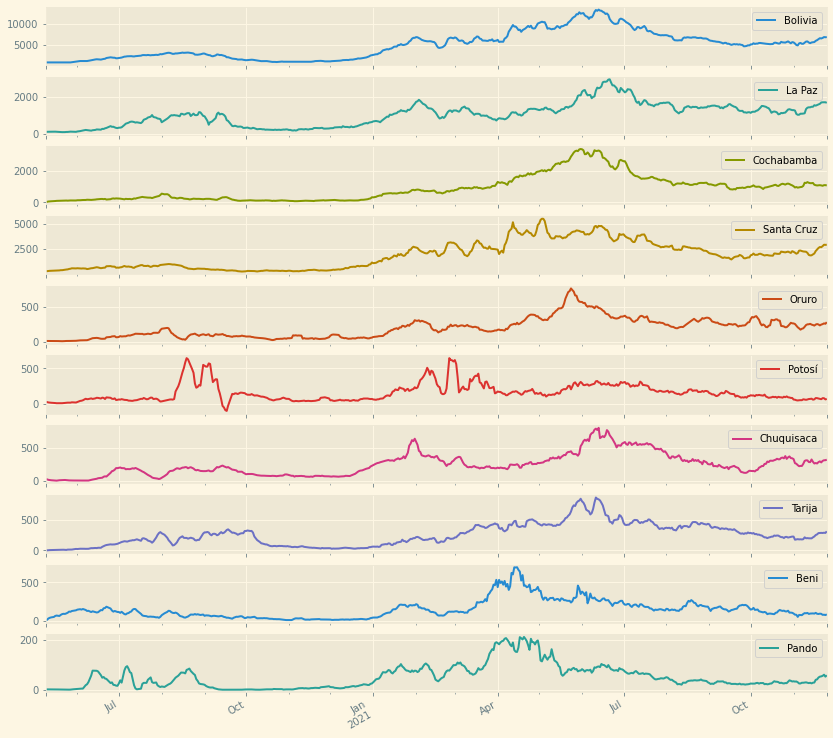

In [25]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7.plot(subplots=True, figsize=(14,14))

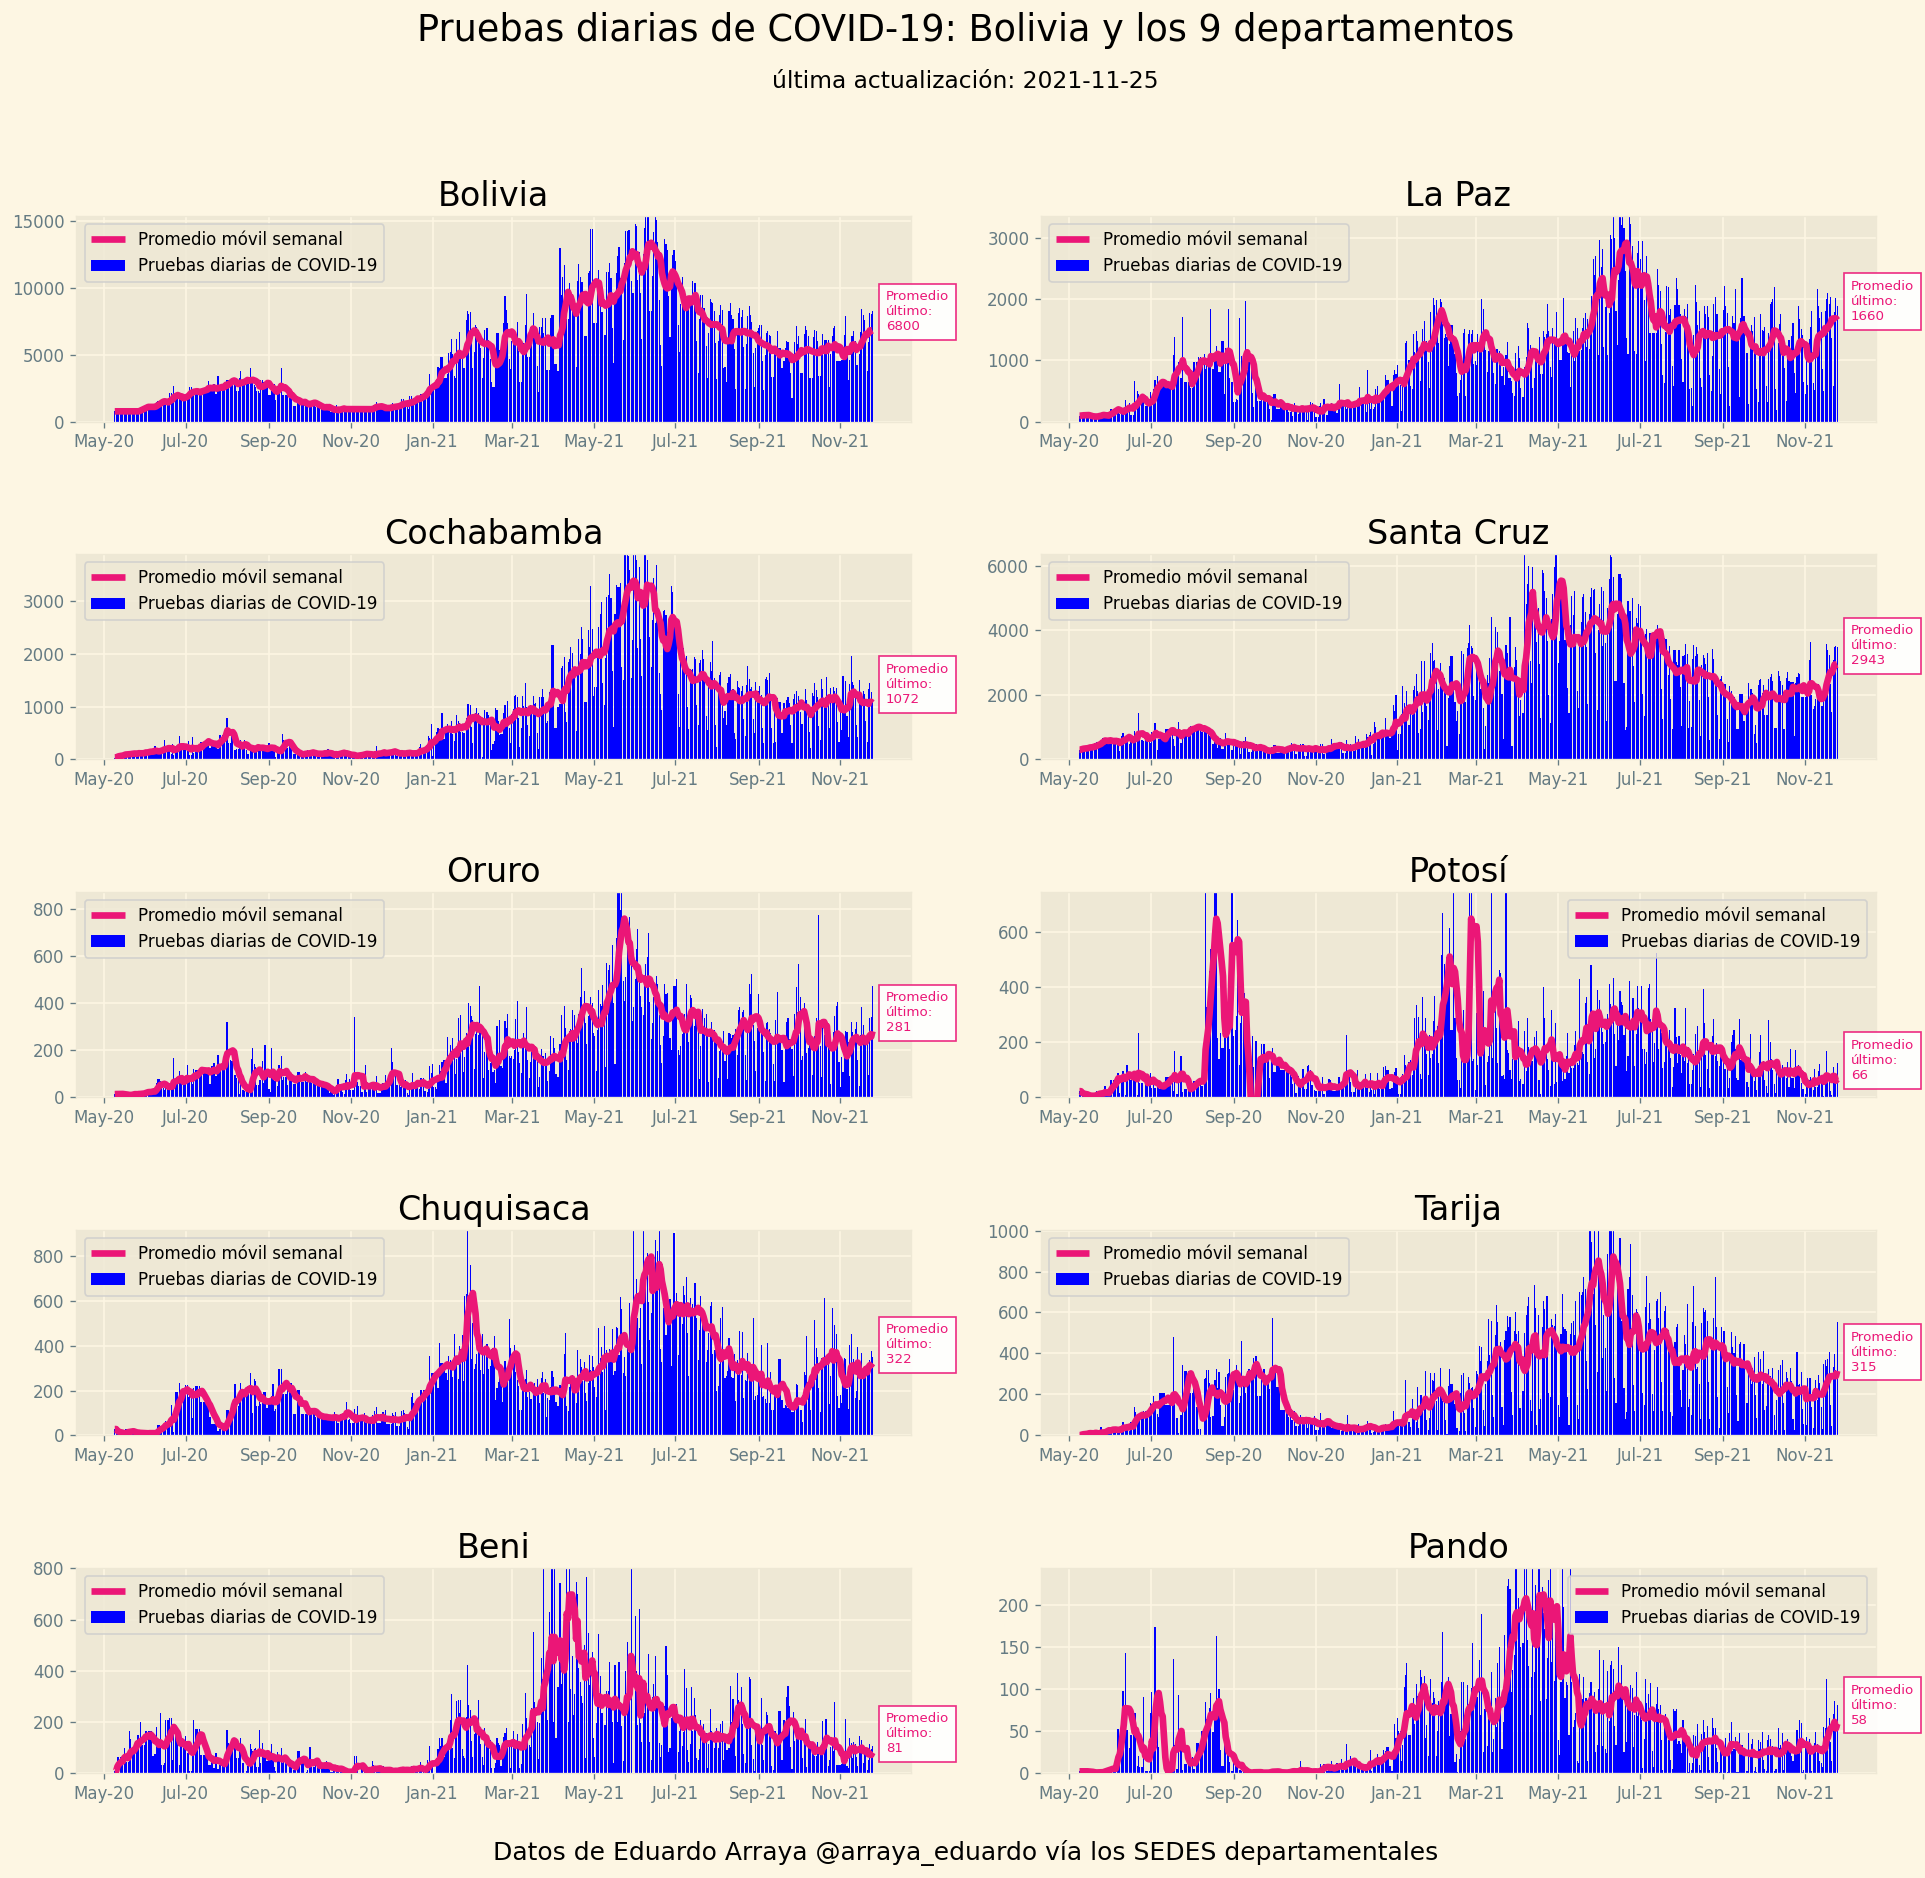

In [26]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
axs = axs.flatten()

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 22, y=1.07)
fig.text(0.5,-.03,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=15, ha="center")
fig.text(0.5, 1.025,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14, ha="center")

for i in range(10):
  axs[i].grid(zorder=1)
  axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
  axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
  axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=4)
  # axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
  axs[i].legend()
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  axs[i].annotate( "Promedio\núltimo:\n" + str(pruebas_diarias7.iloc[-1,i].astype(int)),
      xy = (pruebas_diarias7.index[-1] + datetime.timedelta(days=10), pruebas_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "#EB1677",
      bbox={
              'edgecolor': "#EB1677",
              'facecolor': 'w', 
              'alpha': .9}
          )


fig.tight_layout(pad=0.4, w_pad=2, h_pad=4)

fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-09-30      355      65          77         134     15       2   
2021-10-01      378      75          64         158      8       7   
2021-10-02      356      87          46         151     12      11   
2021-10-03      183      54          20          60     20       5   
2021-10-04      254      25          31         157      2       4   
2021-10-05      431      77          66         197      9      10   
2021-10-06      503      96          77         229     11      12   
2021-10-07      472      89         100         184     16       9   
2021-10-08      410      78          51         185     17       9   
2021-10-09      303      67          32         122      9      15   
2021-10-10      187      50          12          86     13       3   
2021-10-11      199       9          53          69      0      13   
2021-10-12      480      81          88         227      6      13   
2021-10-13      556      73         115         248     10      16   
2021-10-14      542     101          75         222      7      17   
2021-10-15      451      75          61         199     12      10   
2021-10-16      327      50          46         112     66       4   
2021-10-17      177      51          24          70      4      15   
2021-10-18      480      19          81         262      4       7   
2021-10-19      549      55         102         259      6      13   
2021-10-20      483      58          80         229      9      11   
2021-10-21      536      56         106         262     16      15   
2021-10-22      574      79         115         237     23      14   
2021-10-23      433     102          50         185     19      17   
2021-10-24      210      38          41          74     13       7   
2021-10-25      552      33          98         307      2       2   
2021-10-26      677      72         115         333     17       9   
2021-10-27      707      91         137         347     16      18   
2021-10-28      606      82         108         299     13       8   
2021-10-29      652      83          98         320     10       5   
2021-10-30      472      82          50         233     22       7   
2021-10-31      226      42          17         113     23       6   
2021-11-01      482      15         107         265      0       7   
2021-11-02      387      47          62         234     13       7   
2021-11-03      694      54         116         378     11       9   
2021-11-04      880      81          89         506     13      13   
2021-11-05      976      87         118         617     21       7   
2021-11-06      673     121          57         382     35       9   
2021-11-07      364      63          23         221     22       2   
2021-11-08      604      29         132         270     14       5   
2021-11-09      799      84         180         341     29      11   
2021-11-10      884     177         140         381     26      14   
2021-11-11      965     144         155         473     19      26   
2021-11-12     1012     134         150         559     36      18   
2021-11-13      614     143          59         284     29      22   
2021-11-14      341      73          35         152     19       4   
2021-11-15      776      30         193         396      4       0   
2021-11-16      926     108         143         453     26      11   
2021-11-17     1119     149         144         603     34      14   
2021-11-18     1074     148         173         561     28      17   
2021-11-19     1027     167         129         555     18      14   
2021-11-20      668     147          65         304     24       6   
2021-11-21      411      77          53         198     20       3   
2021-11-22      883      22         147         489      8      15   
2021-11-23     1059     103         159         593     28       8   
2021-11-24     1203     190         141         648     38       9   
2021-11-25     1125   

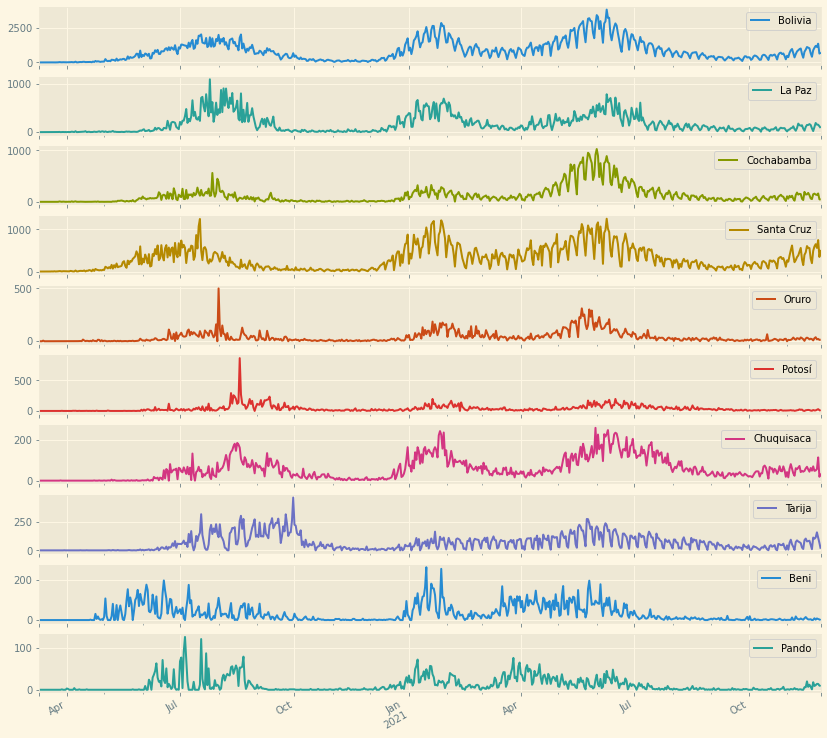

In [27]:
casos_diarios.plot(subplots=True, figsize=(14,14))
casos_diarios.tail(60)

Bolivia  La Paz  Cochabamba   Santa Cruz  Oruro  Potosí  \
2021-09-27  4733.000000   312.0      1143.0  2306.000000   89.0    94.0   
2021-09-28  5945.000000  1099.0      1251.0  2470.000000  354.0   163.0   
2021-09-29  7107.000000  1765.0      1308.0  2505.000000  470.0   227.0   
2021-09-30  5818.000000  1494.0      1080.0  2067.000000  365.0   100.0   
2021-10-01  6384.000000  1475.0      1209.0  2305.000000  566.0   133.0   
2021-10-02  3640.666667  1546.0       897.0  1387.333333  429.0    63.0   
2021-10-03  3640.666667   578.0       665.5  1387.333333  159.0    40.0   
2021-10-04  3640.666667   315.0       665.5  1387.333333  177.0    15.0   
2021-10-05  6504.000000  1447.0      1084.0  2500.000000  403.0   282.0   
2021-10-06  7102.000000  1925.0      1338.0  2548.000000  280.0   199.0   
2021-10-07  6839.000000  1965.0      1126.0  2654.000000  191.0   139.0   
2021-10-08  6379.000000  2013.0       961.0  2421.000000  209.0    99.0   
2021-10-09  3285.333333  2197.0       525.0   977.333333  229.0    48.0   
2021-10-10  3285.333333   538.0       226.0   977.333333  252.0    15.0   
2021-10-11  3285.333333   188.0      1266.0   977.333333   95.0   116.0   
2021-10-12  6308.000000  1289.0      1205.0  2748.000000  231.0    96.0   
2021-10-13  6838.000000  1592.0      1446.0  2599.000000  261.0   127.0   
2021-10-14  6755.000000  1767.0      1315.0  2423.000000  340.0    79.0   
2021-10-15  6007.000000  1273.0      1186.0  2295.000000  250.0   117.0   
2021-10-16  3413.500000  1220.0       628.0   932.000000  775.0    76.0   
2021-10-17  3413.500000   882.0       377.0   932.000000  217.0    76.0   
2021-10-18  5312.000000   333.0      1526.0  2522.000000   88.0    72.0   
2021-10-19  6511.000000  1168.0      1331.0  2709.000000  313.0   130.0   
2021-10-20  6072.000000  1333.0      1037.0  2423.000000  264.0    37.0   
2021-10-21  6097.666667  1082.0      1182.0  2388.333333  224.0   174.0   
2021-10-22  6097.666667  1394.0      1564.0  2388.333333  244.0    72.0   
2021-10-23  6097.666667  1611.0      1041.0  2388.333333  240.0    72.0   
2021-10-24  2594.000000   802.0       588.0   724.000000  201.0    35.0   
2021-10-25  5041.000000   469.0      1364.0  2380.000000   56.0   170.0   
2021-10-26  6408.000000  1250.0      1112.0  2568.000000  229.0    80.0   
2021-10-27  7017.000000  1896.0      1372.0  2673.000000  278.0   117.0   
2021-10-28  7127.000000  1671.0      1297.0  2642.000000  346.0    85.0   
2021-10-29  4535.250000  1515.0      1360.0  1934.000000  390.0    53.0   
2021-10-30  4535.250000  1420.0       702.0  1934.000000  405.0    30.0   
2021-10-31  4535.250000   654.0       338.0  1934.000000  149.0    30.0   
2021-11-01  4535.250000   459.0       984.0  1934.000000   44.0    13.0   
2021-11-02  4557.500000  1103.0       554.0  1971.500000  172.0    63.5   
2021-11-03  4557.500000   605.0      1578.0  1971.500000  107.0    63.5   
2021-11-04  6468.000000  1353.0      1015.0  3096.000000  191.0    64.0   
2021-11-05  7879.000000  1545.0      1495.0  3626.000000  282.0    74.0   
2021-11-06  5309.000000  1807.0       822.0  1984.000000  278.0    39.0   
2021-11-07  3092.000000   636.0       427.0  1569.000000  237.0    27.0   
2021-11-08  4598.000000   522.0      1423.0  1653.000000   90.0   102.0   
2021-11-09  6355.500000  1213.0      1956.0  1872.500000  323.0    38.0   
2021-11-10  6355.500000  2175.0      1466.0  1872.500000  280.0    38.0   
2021-11-11  6774.000000  1887.0      1412.0  2329.000000  261.0    95.0   
2021-11-12  6028.000000  1694.0      1194.0  2179.000000  289.0   120.0   
2021-11-13  4239.000000  1798.0       652.0  1643.000000  322.0    50.5   
2021-11-14  4239.000000   858.0       430.0  1643.000000  160.0    50.5   
2021-11-15  5032.000000   502.0      1500.0  2269.000000   50.0     4.0   
2021-11-16  6648.000000  1808.0      1175.0  2531.000000  265.0    69.0   
2021-11-17  8368.000000  2014.0      1265.0  3592.000000  383.0   168.0   
2021-11-18  7927.000000  2110.0      1292

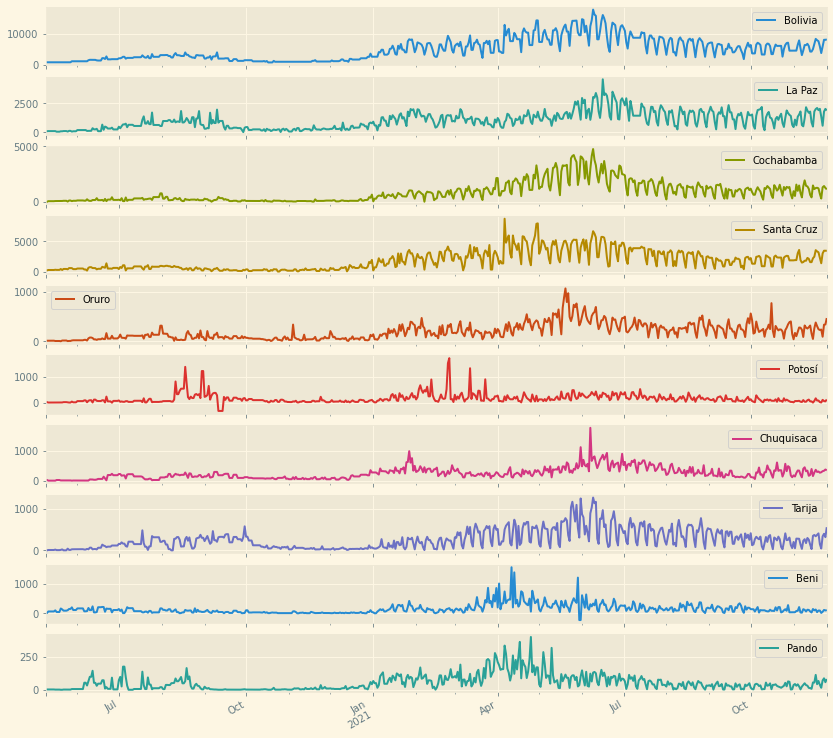

In [28]:
pruebas_diarias.plot(subplots=True, figsize=(14,14))
pruebas_diarias.tail(60)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

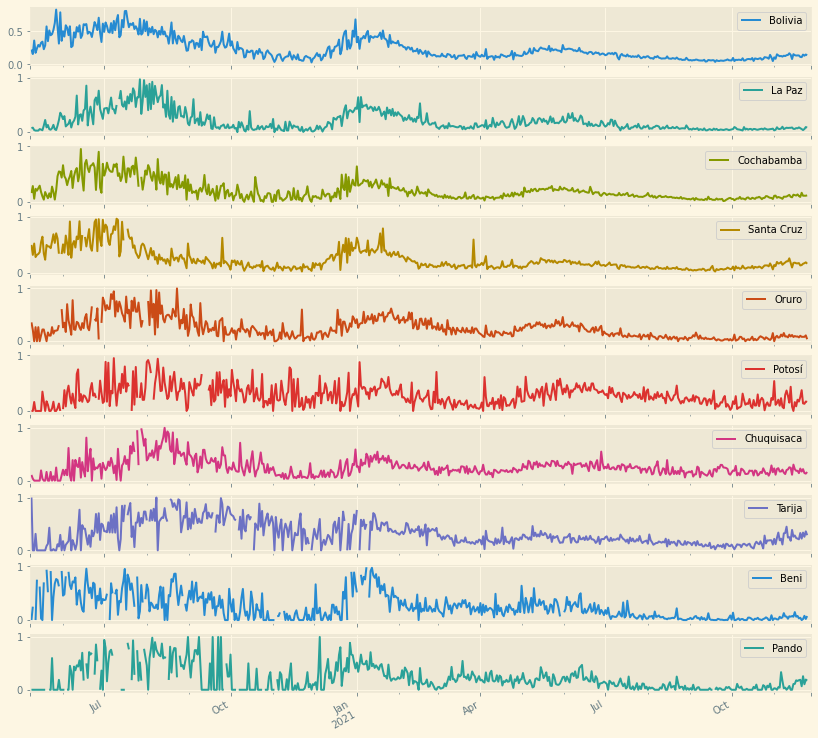

In [29]:
positividad_diaria_raw = casos_diarios / pruebas_diarias#.rolling(5).mean()


positividad_diaria_raw[positividad_diaria_raw>1] = np.nan
positividad_diaria_raw[positividad_diaria_raw<0] = np.nan


# positividad_diaria_raw = casos_diarios / pruebas_diarias#.rolling(5).mean()
positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])

positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw.plot(subplots=True, figsize=(14,14))


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

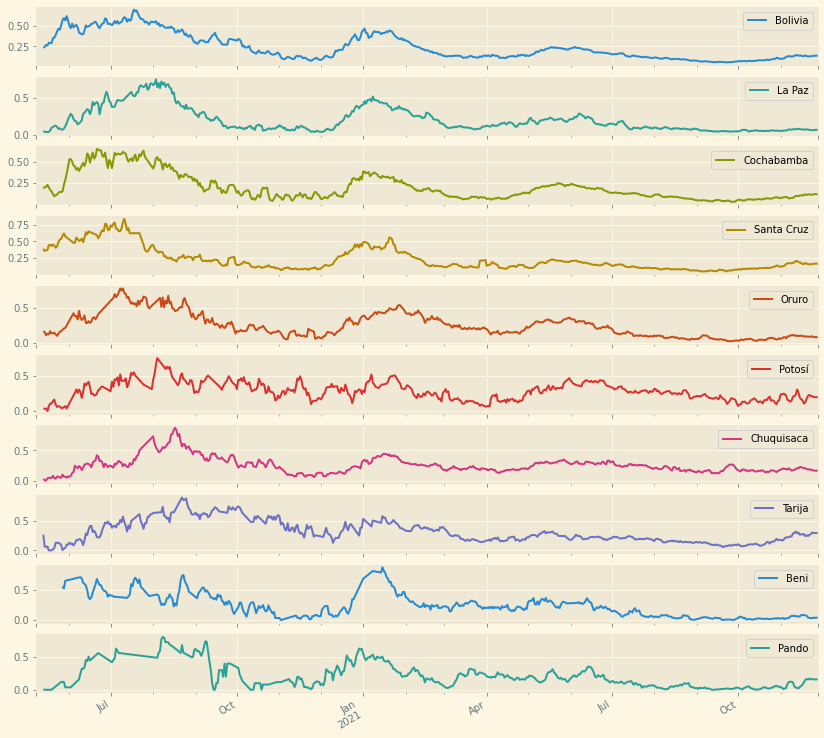

In [30]:
positividad_diaria_adj = positividad_diaria_raw.rolling(5).mean() #,min_periods=1

positividad_diaria_adj = positividad_diaria_adj.interpolate()

positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj.plot(subplots=True, figsize=(14,14))

In [31]:
# xe = casos_diarios
# xe.rolling(3).sum()

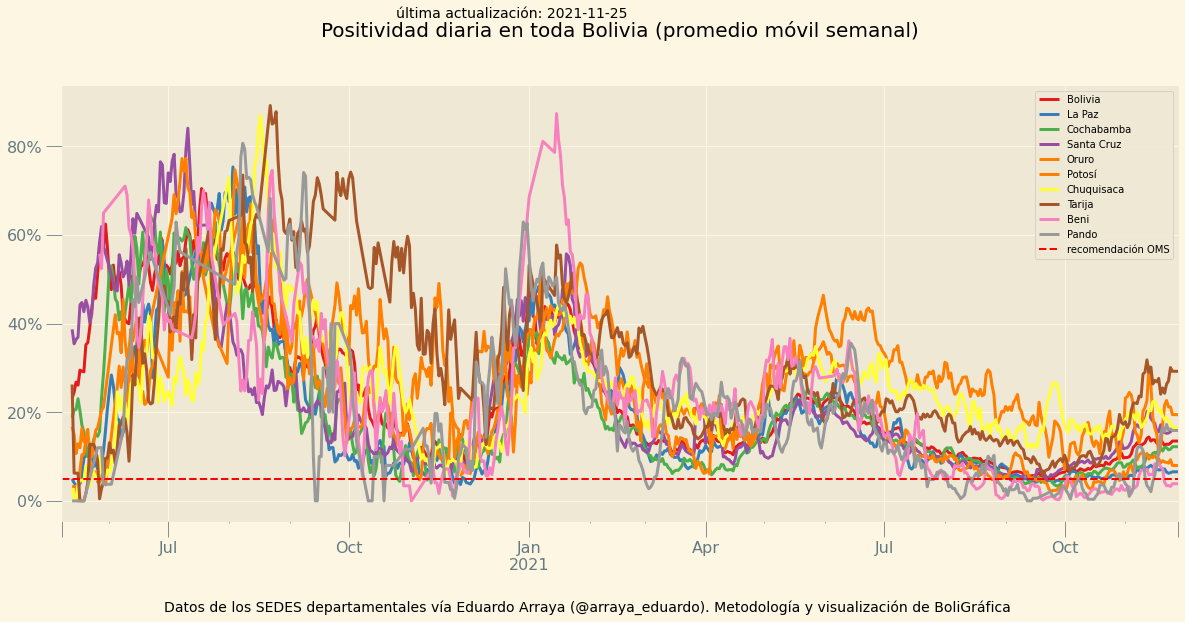

In [32]:
ax = positividad_diaria_adj.plot(figsize = (20,8),zorder=2, linewidth=3, color= cm.get_cmap("Set1",12)(range(1,12)))

plt.grid(zorder=1)
plt.title("Positividad diaria en toda Bolivia (promedio móvil semanal)", fontsize =20, y=1.1)

plt.text(18442,-.25,"Datos de los SEDES departamentales vía Eduardo Arraya (@arraya_eduardo). Metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18560, 1.09,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(size=16)
ax.axhline(y = .05, color="r", linestyle="dashed", label= "recomendación OMS")
ax.legend()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


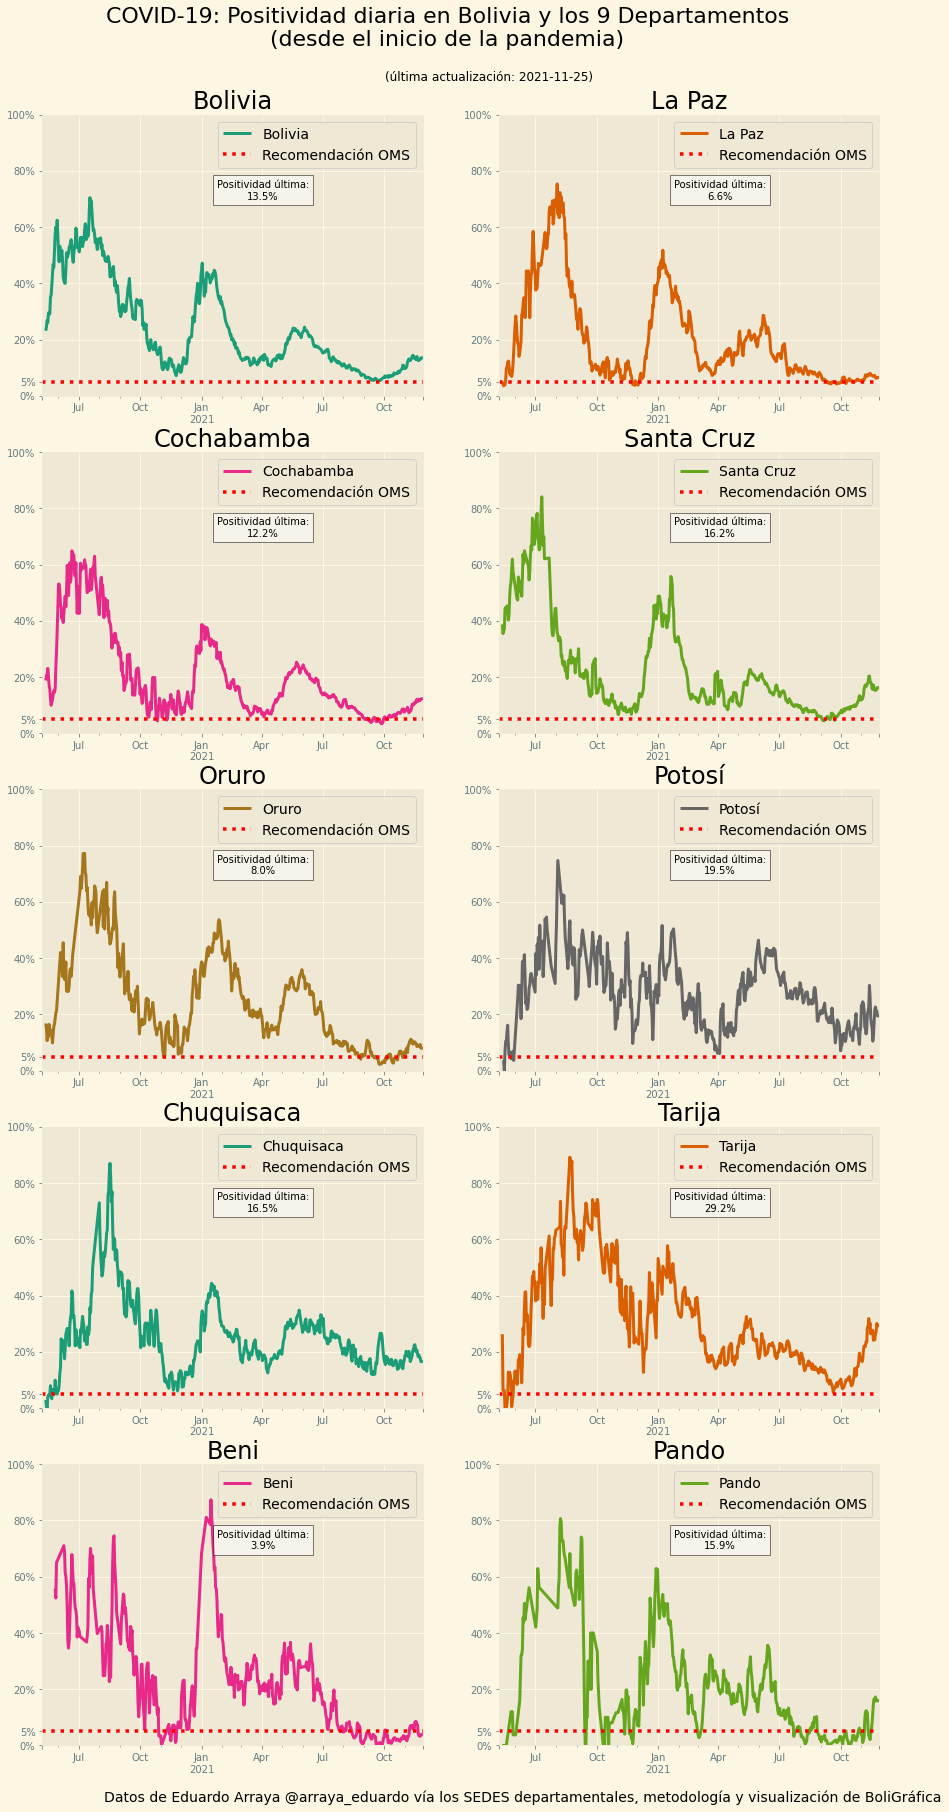

In [33]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3, 
                                                color=cm.get_cmap("Dark2",6)(range(6)))

axs[0][0].get_figure().suptitle('COVID-19: Positividad diaria en Bolivia y los 9 Departamentos\n(desde el inicio de la pandemia)', y=.93, fontsize = 22)
axs = axs.flatten()

for i in range(10):
  axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
  axs[i].legend(fontsize = 14)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
  axs[i].text(18720,.7, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )


plt.text(17800, -.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales, metodología y visualización de BoliGráfica", fontsize=14)
plt.text(18220, 5.92,"(última actualización: {})".format(pruebas_diarias.index[-1].date()), fontsize=12)
plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


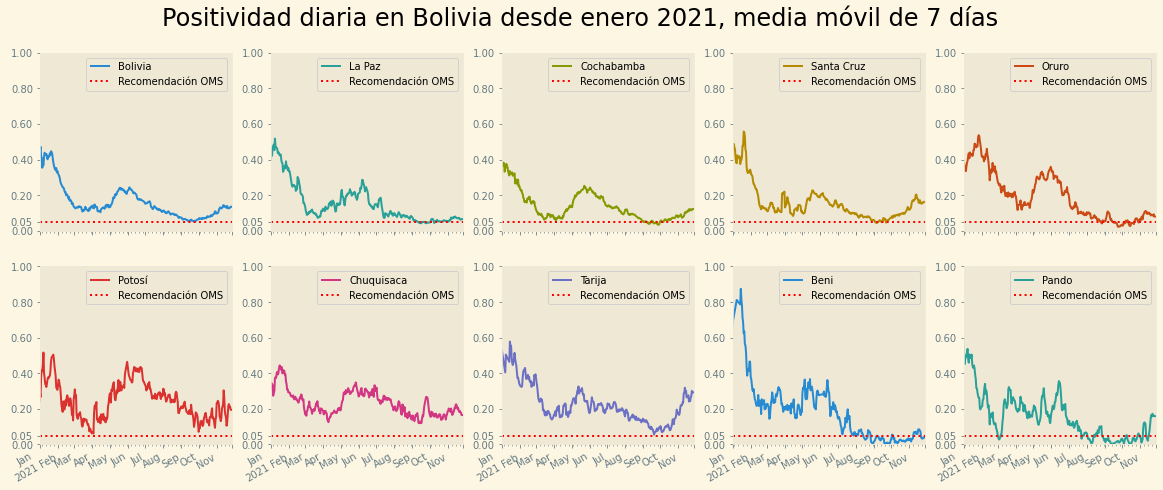

In [34]:
#starts 2021

axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()
  axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


plt.savefig(directory + "positividad_2021.jpg")

# MIX

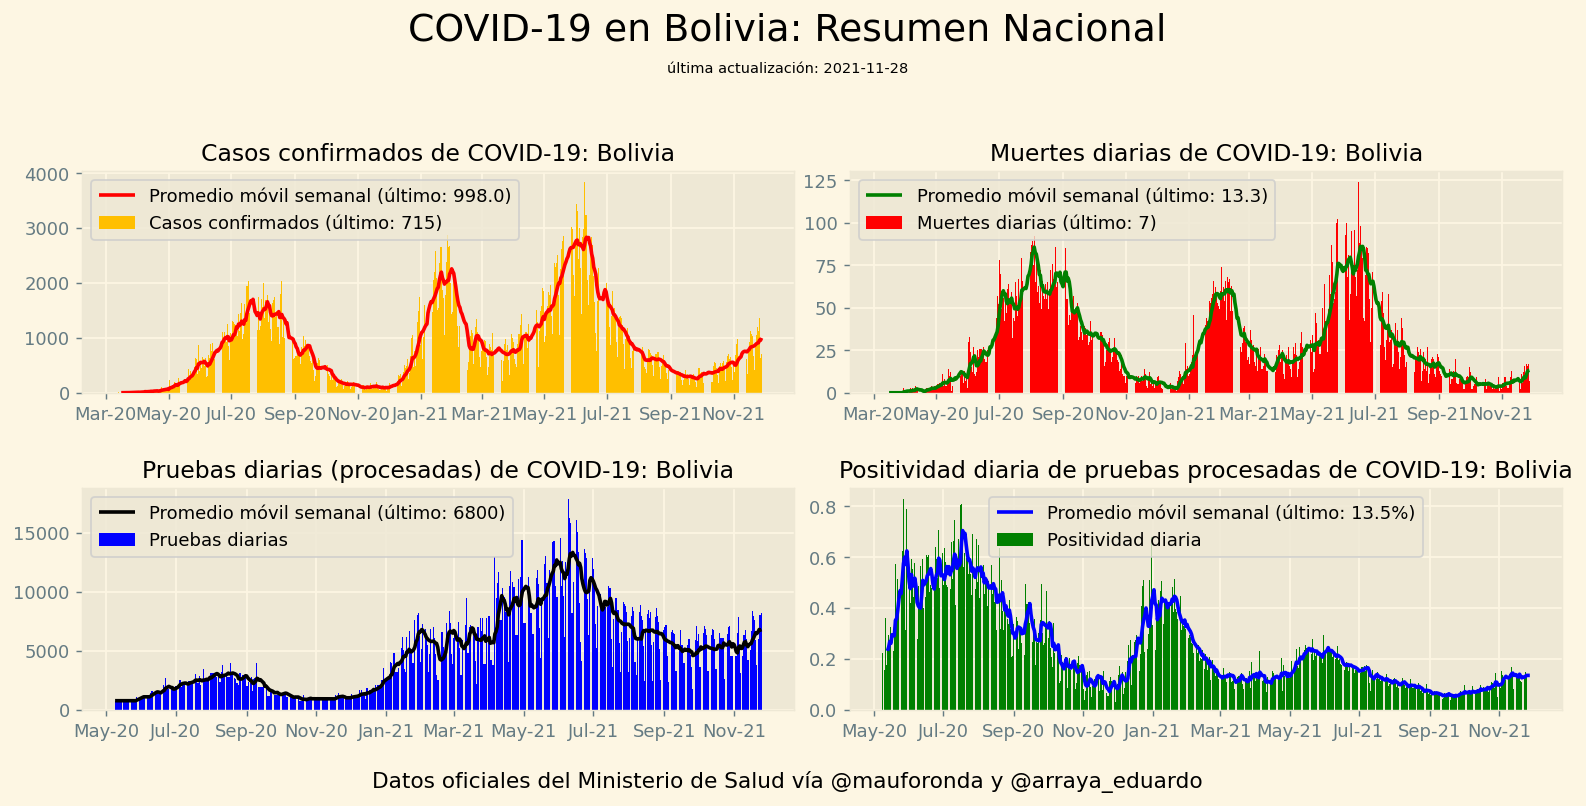

In [35]:
fig, axs = plt.subplots(2,2, figsize = (12,5), dpi=130)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 21, y=1.128)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=12, ha="center")
fig.text(.5, 1.035,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8, ha="center")

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=13) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados (último: {})".format(casos_diarios.Bolivia.iloc[-1].astype(int)),width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3)
# axs[0].set_facecolor(background_color2)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend()
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=13) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias (último: {})".format(muertes_diarias.Bolivia.iloc[-1]),width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3)
# axs[1].set_facecolor(background_color2)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend()
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=13) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias", width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3)
# axs[2].set_facecolor(background_color2)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend()
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=13) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3)
# axs[3].set_facecolor(background_color2)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend()
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)


fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

# ACTIVOS


In [36]:
activos = casos_diarios.rolling(14).sum()      #-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos.to_csv(directory + "activos.csv")
activos

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-11      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-12      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-13      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-14      NaN     NaN         NaN         NaN    NaN     NaN   
...             ...     ...         ...         ...    ...     ...   
2021-11-24  12078.0  1635.0      1746.0      6268.0  331.0   167.0   
2021-11-25  12238.0  1647.0      1725.0      6354.0  330.0   161.0   
2021-11-26  12585.0  1667.0      1737.0      6540.0  316.0   172.0   
2021-11-27  12613.0  1646.0      1728.0      6602.0  300.0   163.0   
2021-11-28  12987.0  1659.0      1734.0      6963.0  296.0   161.0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10         NaN     NaN   NaN    NaN  
2020-03-11         NaN     NaN   NaN    NaN  
2020-03-12         NaN     NaN   NaN    NaN  
2020-03-13         NaN     NaN   NaN    NaN  
2020-03-14         NaN     NaN   NaN    NaN  
...                ...     ...   ...    ...  
2021-11-24       760.0  1001.0  71.0   99.0  
2021-11-25       745.0  1088.0  76.0  112.0  
2021-11-26       817.0  1138.0  73.0  125.0  
2021-11-27       788.0  1179.0  72.0  135.0  
2021-11-28       779.0  1181.0  70.0  144.0  

[629 rows x 10 columns]

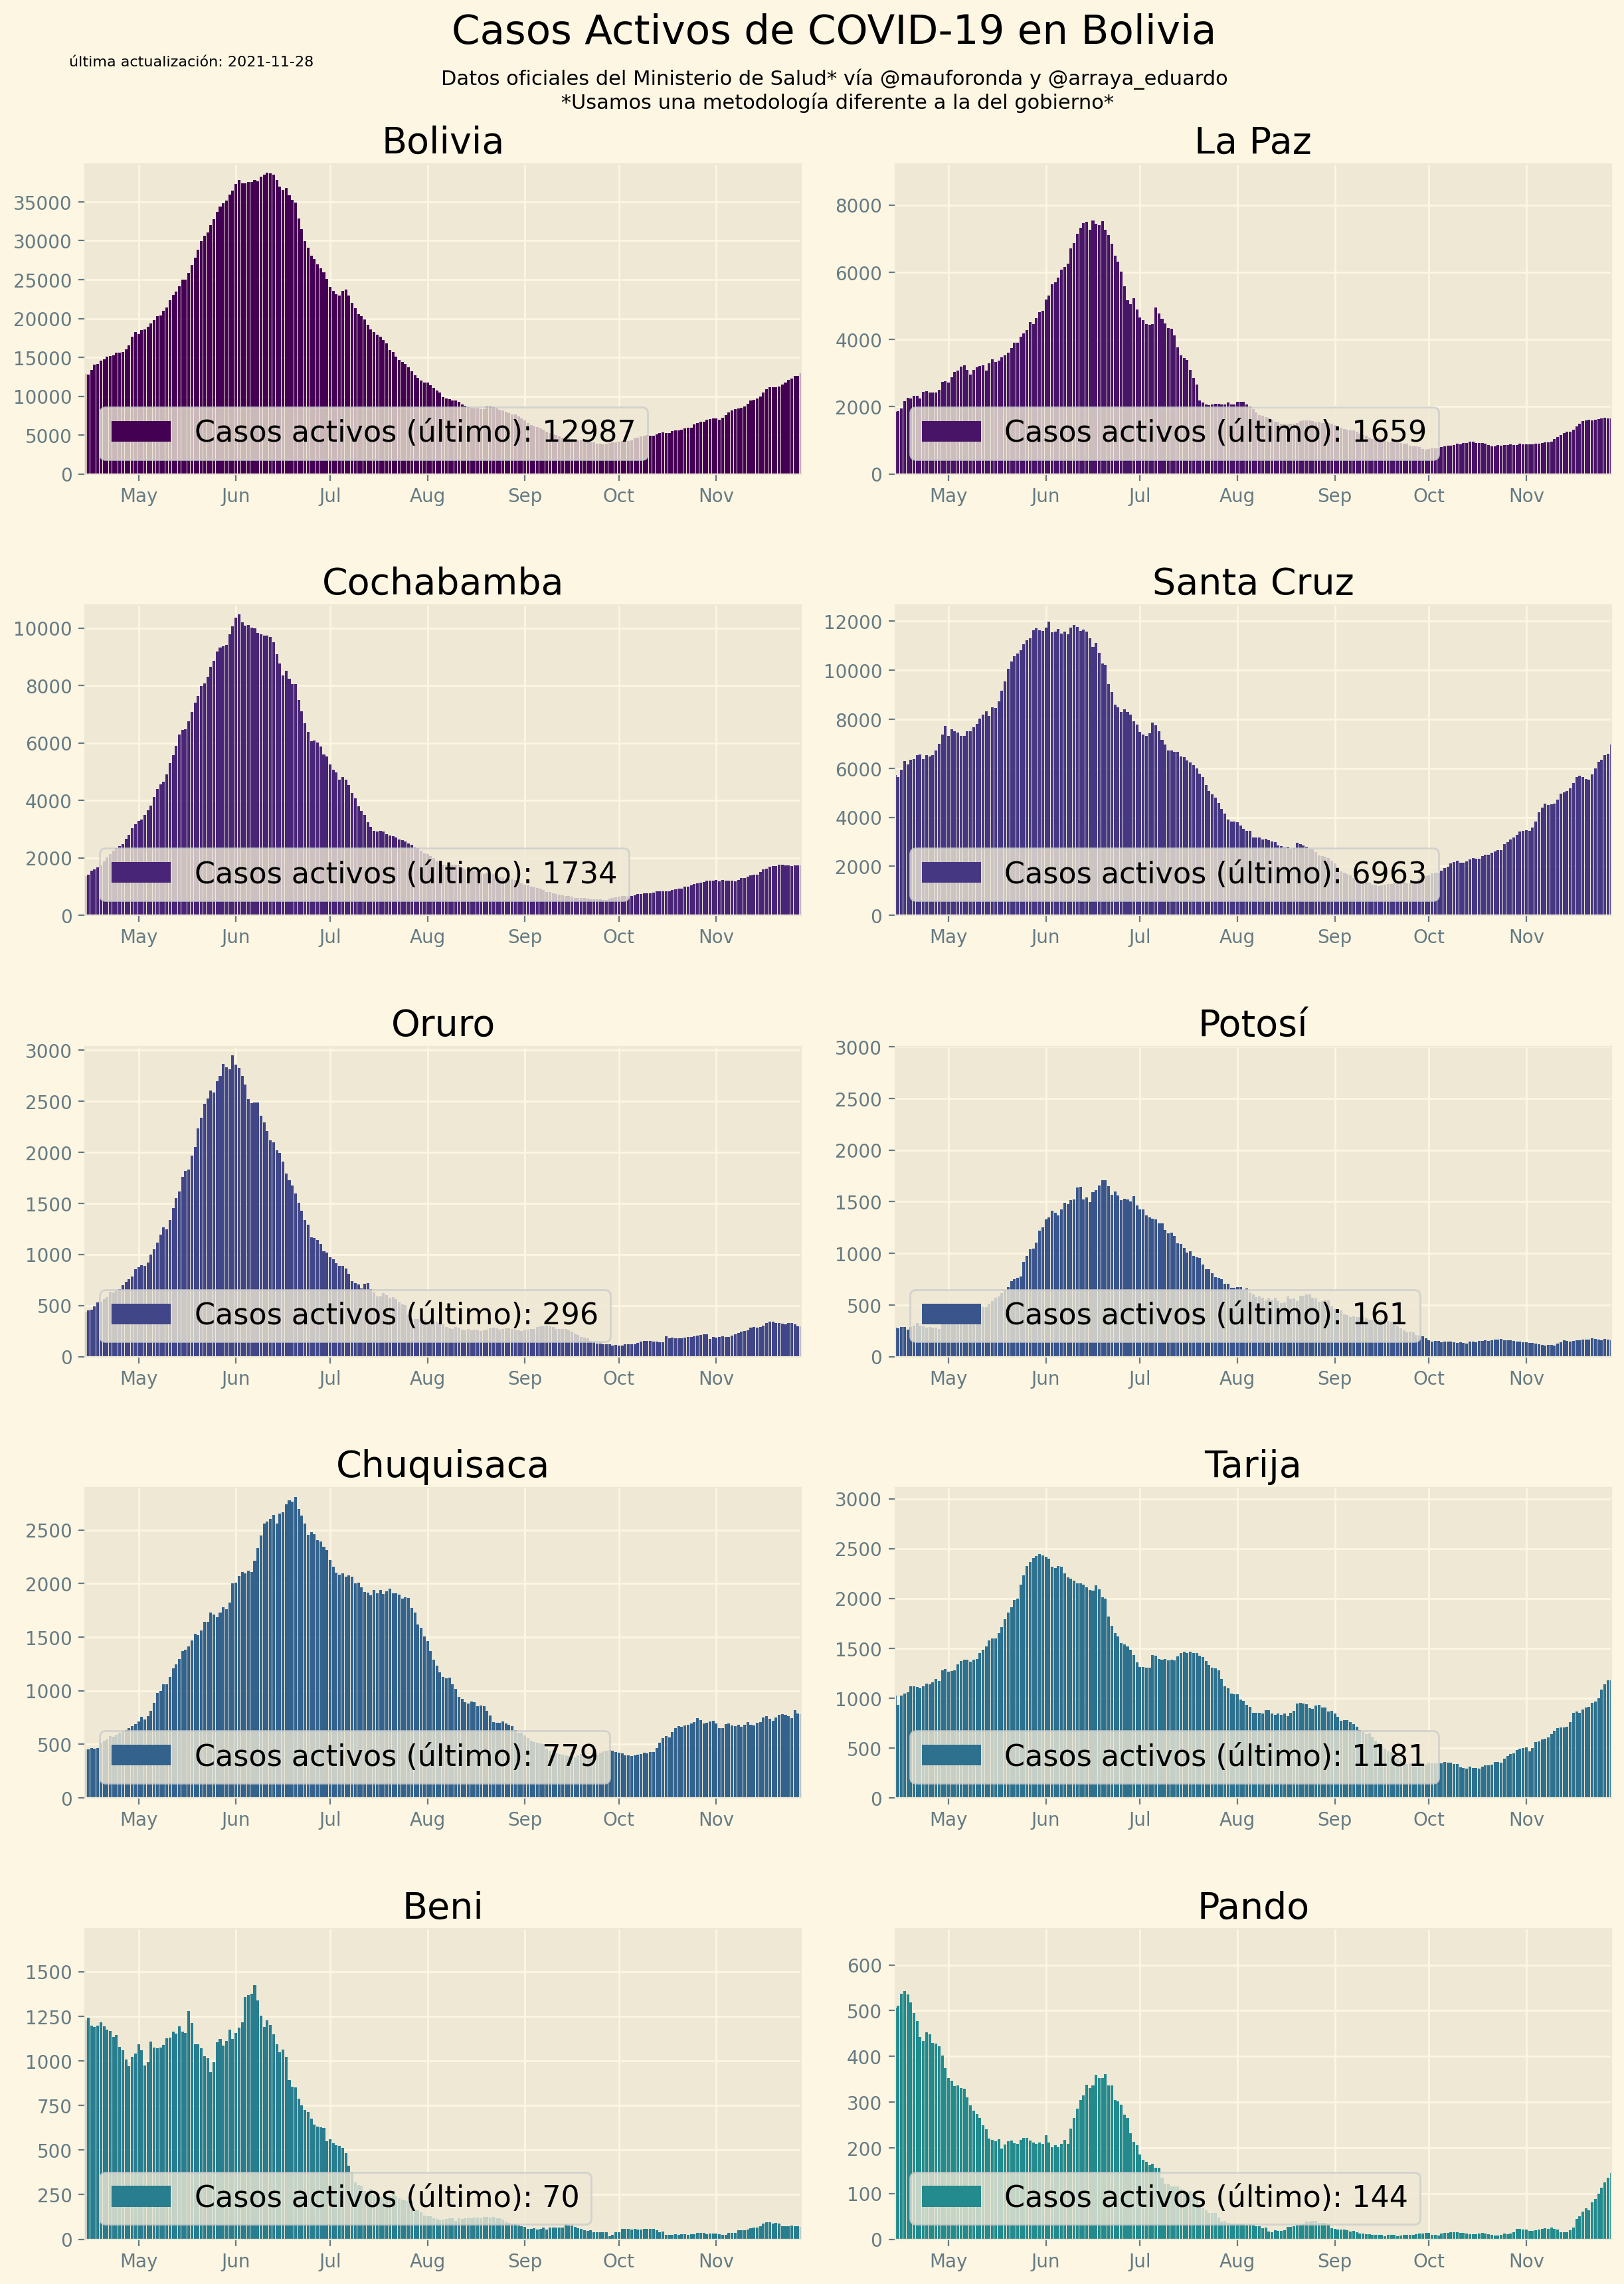

In [37]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=200)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia", fontsize= 22, y=1.065)
fig.text(0.5,1.02,"Datos oficiales del Ministerio de Salud* vía @mauforonda y @arraya_eduardo\n *Usamos una metodología diferente a la del gobierno*", fontsize=11, ha="center")
fig.text(.02, 1.04,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
   axs[i].grid(zorder=3)
   axs[i].set_title(activos.columns[i], fontsize=20) 
   axs[i].bar(activos.index, activos[activos[400:-1].columns[i]], label="Casos activos (último): {}".format(activos.iloc[-1,i].astype(int)),
              width=.85, zorder=2, 
              color = cm.get_cmap("viridis",20)(range(0,10))[i])
   # axs[i].set_facecolor(background_color2)
   axs[i].legend(fontsize=16, loc="lower left")
   axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
   axs[i].set_xlim(activos.index[400], activos.index[-1])
   axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)

fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [38]:
activos_ultimo = activos[-1:]
activos_ultimo.T


2021-11-28
Bolivia        12987.0
La Paz          1659.0
Cochabamba      1734.0
Santa Cruz      6963.0
Oruro            296.0
Potosí           161.0
Chuquisaca       779.0
Tarija          1181.0
Beni              70.0
Pando            144.0

In [39]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                              11.176420
La Paz                                5.667919
Cochabamba                            8.546082
Santa Cruz                           20.661721
Oruro                                 5.501859
Potosí                                1.784922
Chuquisaca                           12.229199
Tarija                               20.257290
Beni                                  1.458333
Pando                                 9.350649

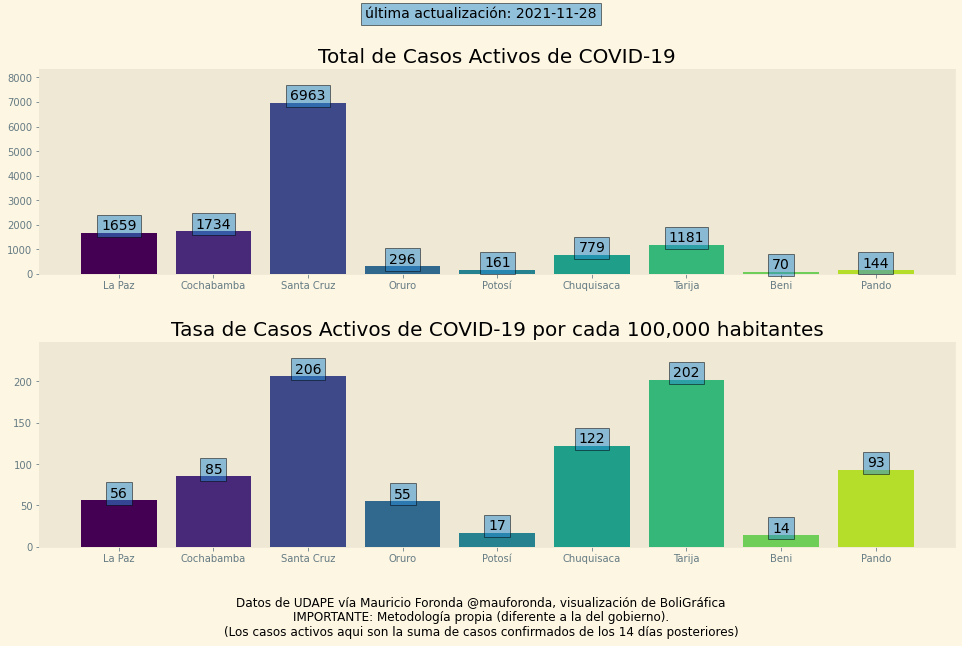

In [40]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

fig.text(.5, 1,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=14, ha="center", bbox={"alpha":0.5})
fig.text(0.5,-.073,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica\nIMPORTANTE: Metodología propia (diferente a la del gobierno).\n(Los casos activos aqui son la suma de casos confirmados de los 14 días posteriores)", 
         fontsize=12, ha="center")

bar1 = axs[0].bar(activos_ultimo.T.index[1:10], activos_ultimo.T[1:10][activos_ultimo.T.columns[0]], color = cm.get_cmap("viridis",10)(range(10)))
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
axs[0].bar_label(bar1, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[0].grid(axis="both")


bar2 = axs[1].bar(activos_ultimo_pc.T.index[1:10], (activos_ultimo_pc.T[1:10]["Activos por cada 10,000 habitantes"]*10).astype(int), color = cm.get_cmap("viridis",10)(range(10)))
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 100,000 habitantes", fontsize = 20)
axs[1].bar_label(bar2, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[1].grid(axis="both")
axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)





fig.tight_layout(pad=3)

fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")

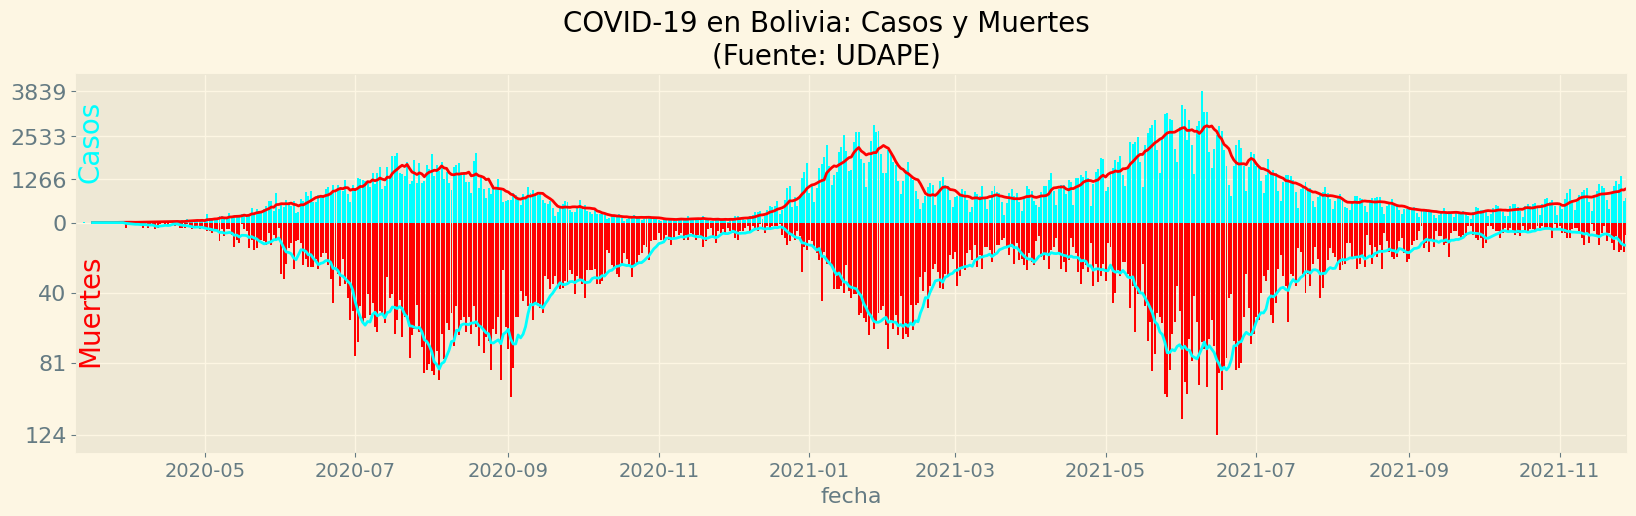

In [41]:

def plotter(region, start=0, end = -1, multiplier  = -50, bar_label=False):
    
    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="cyan")   
    barm = axs.bar(muertes.index, muertes * multiplier, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="r")
    axs.plot(muertes.index, muertes.rolling(7).mean() * multiplier , color="cyan")

    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    # axs.set_ylim(muertes[start:].max()*-1.1, casos[start:].max()*1.2)
    axs.set_xlabel("fecha", fontsize=16)
    axs.set_yticks([casos.max()*1,
                    casos.max()*.66,
                    casos.max()*.33,
                    0,
                    muertes.max()*.33 * multiplier,
                    muertes.max()*.66 * multiplier,
                    muertes.max()* 1 * multiplier
                   ])
    axs.set_yticklabels([
                    int(casos.max()*1),
                    int(casos.max()*.66),
                    int(casos.max()*.33),
                    (0),
                    int(muertes.max()*.33),
                    int(muertes.max()*.66),
                    int(muertes.max()* 1)
                   ],
        fontsize=16
        )
    plt.xticks(fontsize=14)

    if bar_label==True:
        axs.bar_label(barc)
        axs.bar_label(barm)



    axs.annotate("Casos",
                xy=(casos.index[start], casos.max()*.35),
                fontsize=20,
                color="cyan",
                rotation=90)
    axs.annotate("Muertes",
                xy=(muertes.index[start], muertes.max()*.65*multiplier),
                fontsize=20,
                color="r",
                rotation=90)

###############################################################################################
###############################################################################################
###############################################################################################


   
# for i in casos_diarios.columns:
#     plotter(i)
    
plotter("Bolivia")


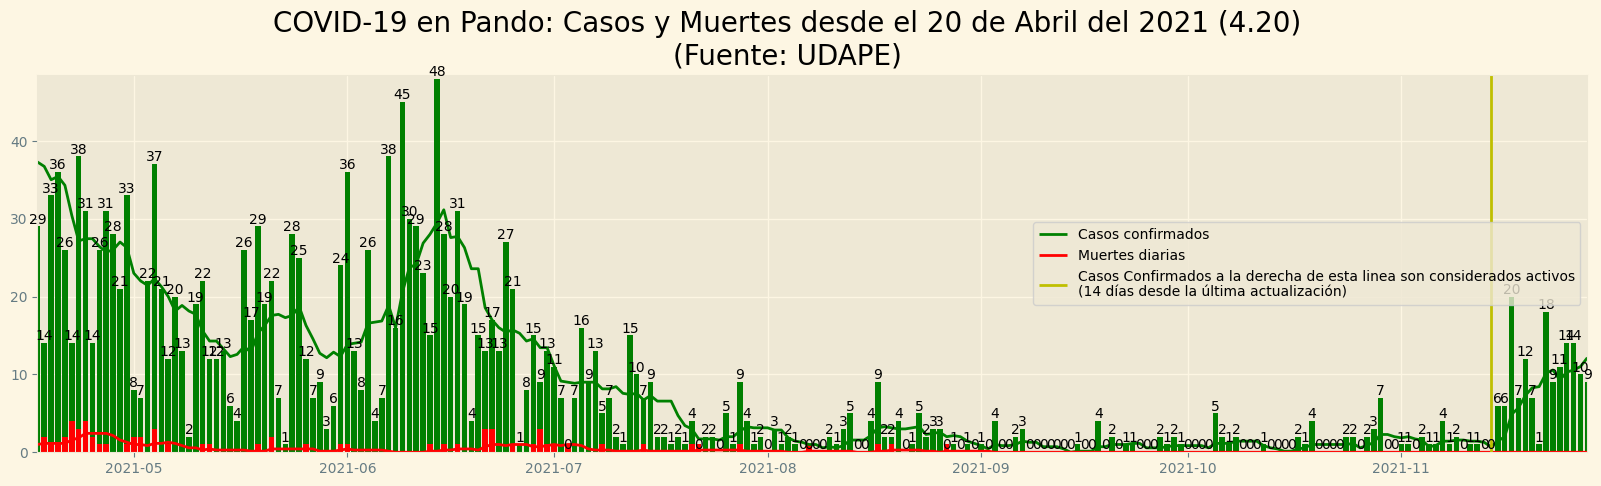

In [42]:
def plotter1(region, start=0, extra=0):

    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes desde el 20 de Abril del 2021 (4.20)\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="g")   
    barm = axs.bar(muertes.index, muertes, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="g", label="Casos confirmados")
    axs.plot(muertes.index, muertes.rolling(7).mean(), color="r", label="Muertes diarias")
    axs.axvline(muertes.index[-15], color="y", label="Casos Confirmados a la derecha de esta linea son considerados activos\n(14 días desde la última actualización)")
    axs.bar_label(barc)
    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    axs.set_ylim(0, casos[start:].max()*1.01) 
    axs.legend(loc="center right")
    
plotter1("Pando", start=403)
# plotter1("Beni", start=403)

<BarContainer object of 15 artists>

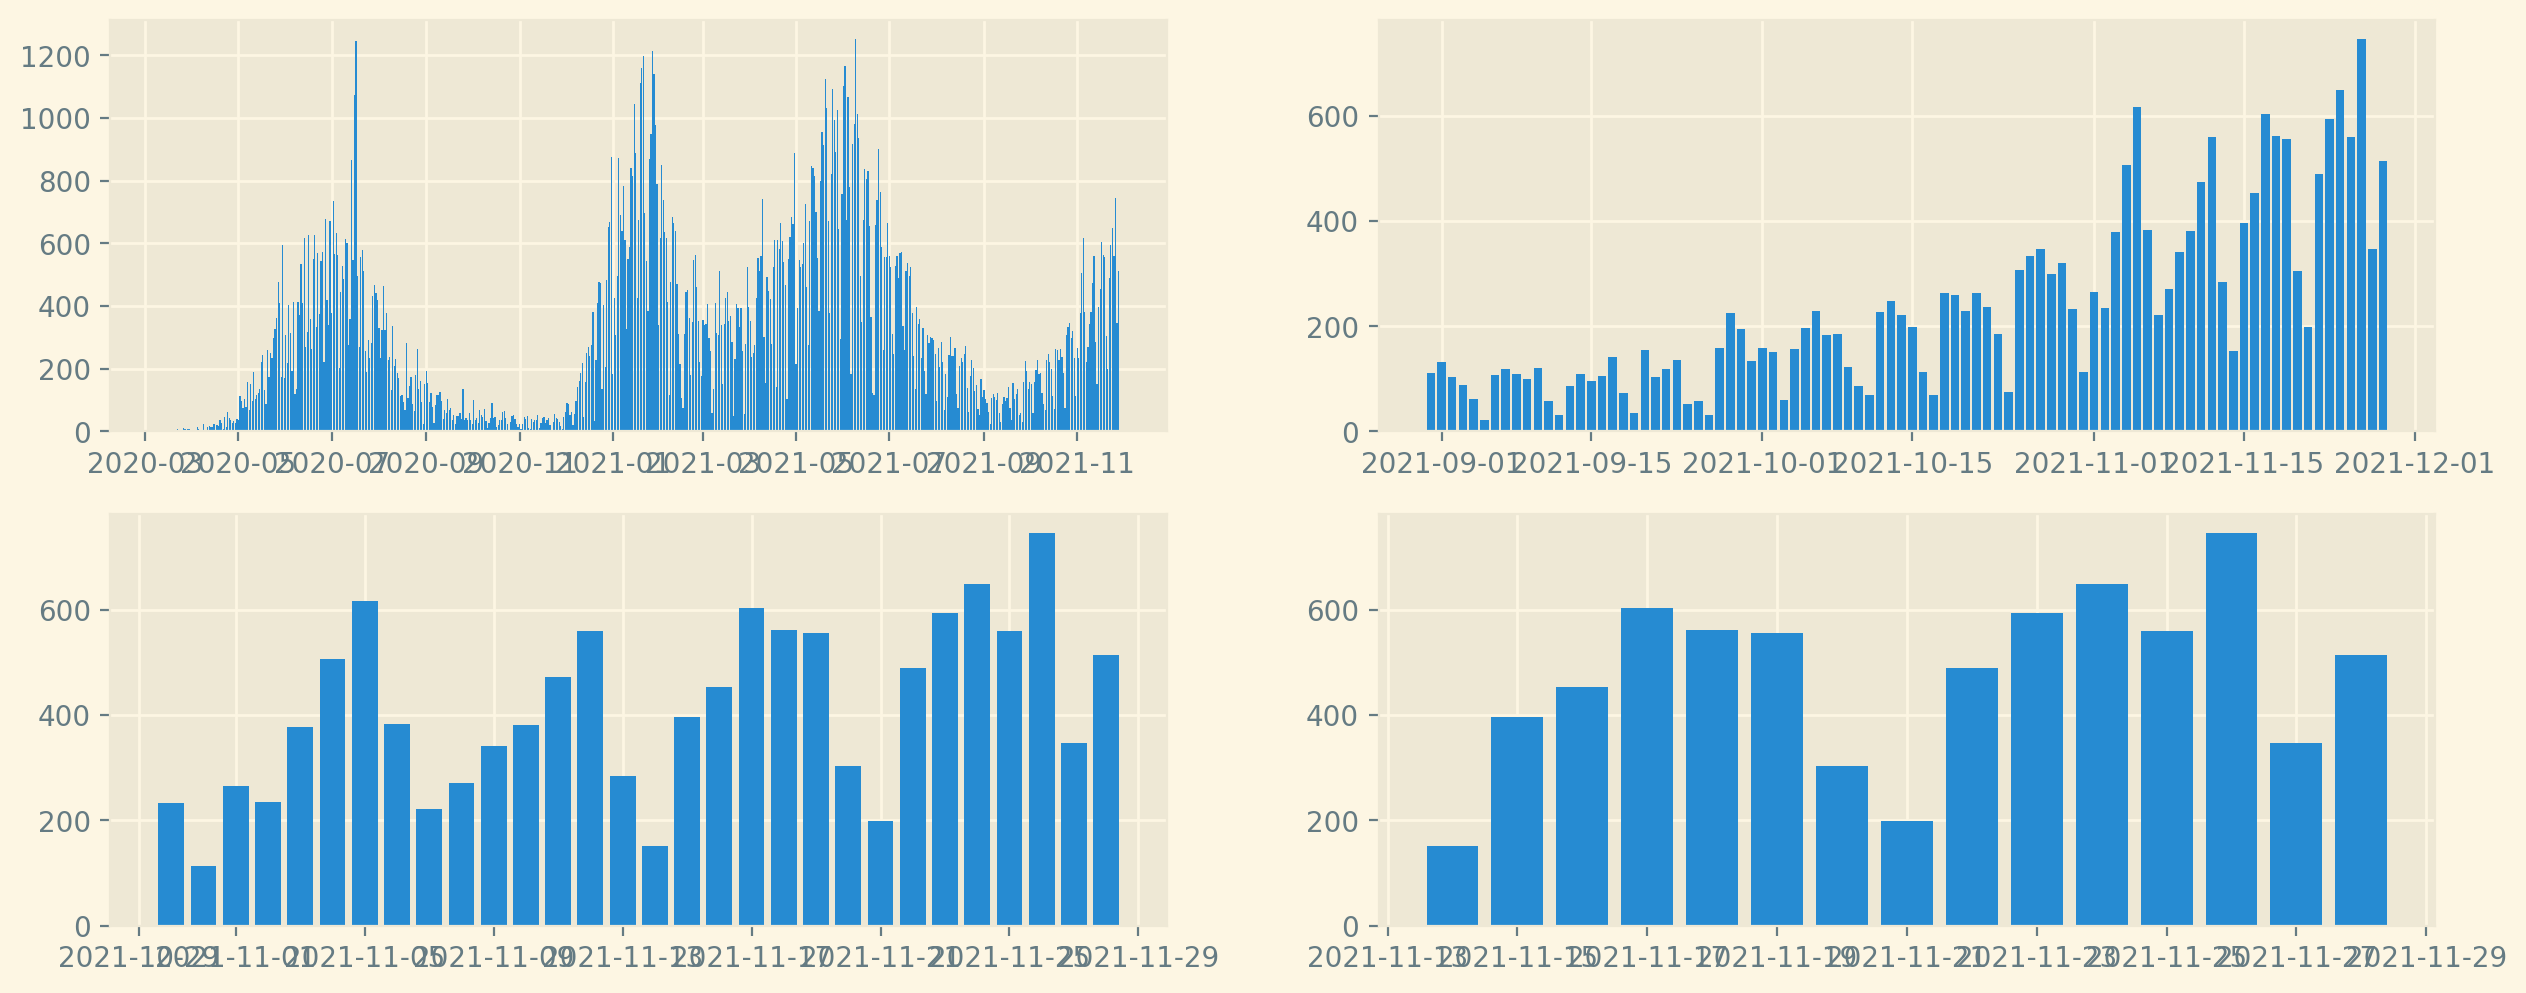

In [43]:
scz = casos_diarios["Santa Cruz"]
scz.index = pd.to_datetime(scz.index)

fig, axs = plt.subplots(2,2,figsize=(15,6), dpi=200)
axs= axs.flatten()

axs[0].bar(scz.index, scz)
lim2= -90
axs[1].bar(scz.index[lim2:], scz[lim2:])
lim3= -30
axs[2].bar(scz.index[lim3:], scz[lim3:])
lim4= -15
axs[3].bar(scz.index[lim4:], scz[lim4:])